<a href="https://colab.research.google.com/github/FranciscoMoralesActuary/An-lisis-de-regresi-n-Series-de-tiempo/blob/main/Tarea_4_Equipo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
  ## **a) Integrantes**:🎓​
  ---




| Integrantes   | No. de cuenta    |
|----------|------|
| Bohórquez Nuño Ana Elizabeth        | 422101862     |
| Cervantes Vasconcelos María Fernanda| 318711827    |
| Hernandez Vargas Hector | 422020053|
| Lugo Salazar María Ines     | 422088480 |
|Morales Ramirez Angel Francisco |422093653|
| Tienda Tienda Sebastian | 319035090 |
|Zuñiga Galván Diego Antonio | 422106104 |


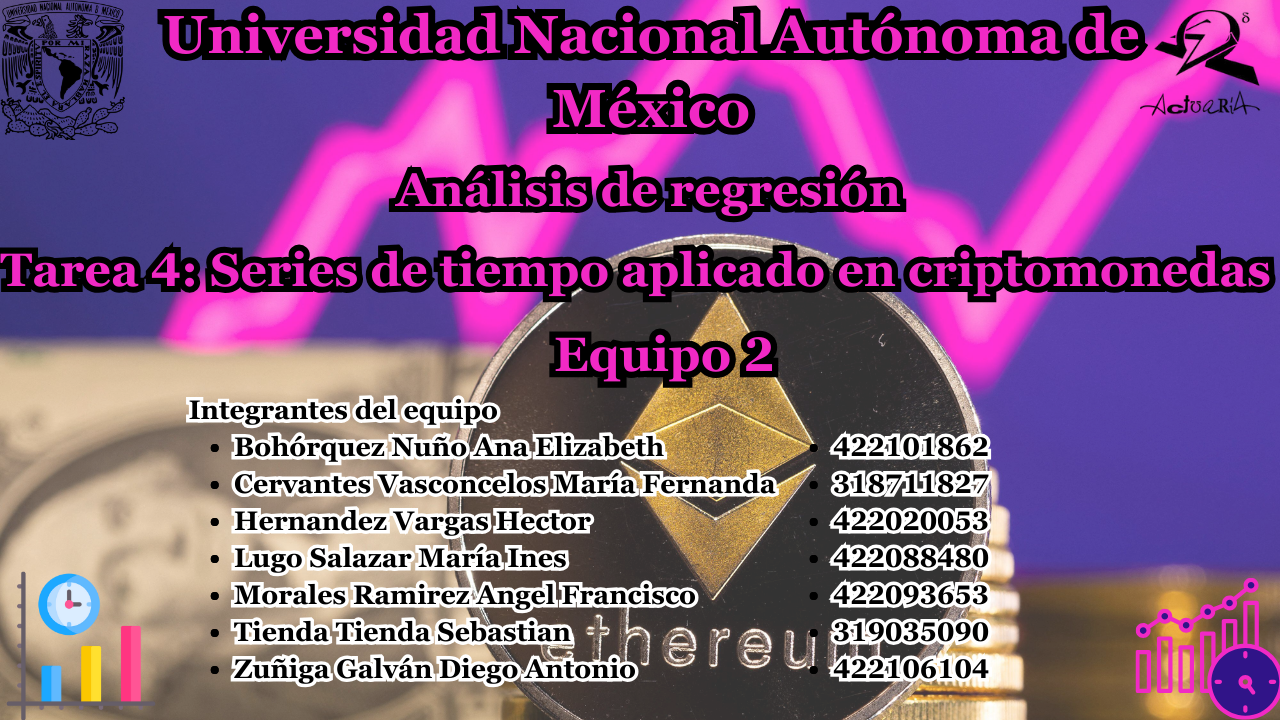

---
  ## **Indicaciones**:👨‍🏫
  ---


############################
## CUARTA TAREA EN EQUIPO ####
## SERIES DE TIEMPO ####
############################

Para esta su cuarta tarea en equipo deberán realizar el análisis de una serie de tiempo ocupando lo revisado en clase y los códigos en los temas 9.1, 9.3 y 9.4 de la forma siguiente:

Distribución de los datos por equipo:

Equipo 1: https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_Dogecoin.csv

Equipo 2: https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_Ethereum.csv

Equipo 3: https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_Litecoin.csv

Equipo 4:  https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_Dogecoin.csv

Equipo 5: https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_Solana.csv

Equipo 6: https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_Cardano.csv

Data comodin: https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_Tether.csv

La Data comodin se podrá utilizar por el equipo que primero informe al profesor respondiendo a este mensaje de que el equipo esta cambiando su set de datos asignado por el comodin, tengan en cuenta que si no es informado en tiempo no se hara valido el cambio solicitado y otro equipo que debidamente haga solicitado el cambio se le asignara el dataset.

Lineamientos
Cada equipo realizará el análisis de la cripto moneda que le haya sido asignada, deberá realizar el análisis de los elementos de una serie de tiempo así como desarrollar el modelo que mejor ajuste a dicha serie temporal. El análisis deberá contener las pruebas a los principales puntos de revisión de una serie temporal así como determinar el tipo de serie (estacional, con que tipo de tendencia, autorregresiva y de que grado, etc.), así conducir el análisis inferencial con las pruebas vistas en clase (se pueden añadir más pruebas si el equipo lo considera necesario).

Contenido del Colab (no se recomienda usar Tableau ya que no tiene el alcance deseado)

a. Encabezado con el nombre de los integrantes


b. Descripción del set de datos


c. Definición de la variable objetivo (variable Y)


d. Análisis de la serie temporal


e. Análisis estadístico y visual


f. Explicación de los parámetros así como de las pruebas conducidas


g. Explicación de resultados y medidas de desempeño del modelo (MAE, MAPE, MSE, etc.)


h. Conclusiones y recomendaciones



El documento se entrega en google Colab, el archivo y los datos deberán estar compartidos, les recomiendo hagan pruebas antes de compartirme su Colab.

El Colab lo deberán compartir en este canal y ustedes serán los responsables por la seguridad de su documento.

Para los que decidan usar R dentro de Colab deberán describir cada función de regresión que requieran utilizar, mismo caso si no utilizan las librerías de sklearn o statmodels de Python.

Nota: Si lo desean pueden comparar técnicas de machine learning para esta tarea.

Los criterios de evaluación son:


a. Originalidad en la presentación del dataset


b. Dominio en el conocimiento del dataset


c. Originalidad en la presentación de resultados (formatos de las tablas y gráficas diferentes a los que da python por default)


d. Profundidad en las Hipótesis planteadas


e. Grado de dominio de los conceptos de series de tiempo



El tiempo para entregar esta su segunda tarea será el Lunes 12 de mayo del presente.


---
#**b) Descripción del set de datos**:📋
---

 Fuente de los datos [Precios Ethereum](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_Ethereum.csv)


| Variable   | Descripción    | Tipo|
|----------|------|------|
| Date    | Fecha de la operación    | Fecha |
| SNo| Serial Number (Número de serie)   | Entero|
|Name| Nombre de la criptomoneda (Ethereum)| Texto|
|Symbol| Simbolo de la criptomoneda (ETH)| Texto|
|High| Máximo precio tranzado| Flotante|
|Low| Mínimo precio tranzado|Flotante|
|Open| Precio de apertura|Flotante|
|Close| precio de cierre|Flotante|
|Volume| Dinero tranzado|Flotante|
|Market Cap|Capital de la criptomoneda en dolares.|Flotante|

In [ ]:
#Dataframes
import pandas as pd
#Cálculos matemáticos
import numpy as np
#Fechas
import datetime
#Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
#Mostrar imágenes dentro de gráficos
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import imageio.v2 as imageio
#Leer archivos con url
import urllib.request
#Series de tiempo
#en 3 componente tendencia, estacionalidad y residuo
from statsmodels.tsa.seasonal import seasonal_decompose
#Prubea Fuller
from statsmodels.tsa.stattools import adfuller
#Gráfico de autocorrelación
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#Modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA
#Predicciones
from statsmodels.graphics.tsaplots import plot_predict



In [ ]:
#Link del repositorio
url_datos=('https://raw.githubusercontent.com/FranciscoMoralesActuary/An-lisis-de-regresi-n-Series-de-tiempo/main/coin_Ethereum.csv')
#Leer archivo
#parse_dates-->Convertir en un dato tipo fecha
df= pd.read_csv(url_datos,parse_dates=['Date'])

In [ ]:
#Orginalidad en la preesntación del dataset
#Dataframe en formato con 4 decimales y usando , (comas) para separar miles
pd.options.display.float_format = '{:,.4f}'.format
#Eliminar hora
df["Date"] = pd.to_datetime(df["Date"]).dt.date

In [ ]:
print(f"Se analiza la fecha desde {df['Date'].min()} hasta {df['Date'].max()}")

Se analiza la fecha desde 2015-08-08 hasta 2021-07-06


In [ ]:
#Mostrar 5 primeros registros del dataframe
df.head()

SNo      Name Symbol        Date   High    Low   Open  Close  \
0    1  Ethereum    ETH  2015-08-08 2.7988 0.7147 2.7938 0.7533   
1    2  Ethereum    ETH  2015-08-09 0.8798 0.6292 0.7061 0.7019   
2    3  Ethereum    ETH  2015-08-10 0.7299 0.6365 0.7140 0.7084   
3    4  Ethereum    ETH  2015-08-11 1.1314 0.6632 0.7081 1.0679   
4    5  Ethereum    ETH  2015-08-12 1.2899 0.8836 1.0588 1.2174   

          Volume       Marketcap  
0   674,188.0000 45,486,894.2408  
1   532,170.0000 42,399,573.4991  
2   405,283.0000 42,818,364.3945  
3 1,463,100.0000 64,569,288.4328  
4 2,150,620.0000 73,645,010.9863

In [ ]:
#Mostrar 5 ultimos registros del dataframe
df.tail()

SNo      Name Symbol        Date       High        Low       Open  \
2155  2156  Ethereum    ETH  2021-07-02 2,155.5965 2,021.8248 2,109.8927   
2156  2157  Ethereum    ETH  2021-07-03 2,237.5672 2,117.5900 2,150.8350   
2157  2158  Ethereum    ETH  2021-07-04 2,384.2869 2,190.8377 2,226.5504   
2158  2159  Ethereum    ETH  2021-07-05 2,321.9228 2,163.0414 2,321.9228   
2159  2160  Ethereum    ETH  2021-07-06 2,346.2949 2,197.9194 2,197.9194   

          Close              Volume            Marketcap  
2155 2,150.0404 31,796,212,553.9500 250,552,745,326.3900  
2156 2,226.1143 17,433,361,640.7900 259,447,545,607.5300  
2157 2,321.7241 18,787,107,473.0900 270,621,669,241.0500  
2158 2,198.5825 20,103,794,829.4900 256,297,846,064.3500  
2159 2,324.6794 20,891,861,314.4400 271,028,619,181.2000

In [ ]:
#Dimensiones de los datos
df.shape

(2160, 10)

In [ ]:
#Infomación del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2160 non-null   int64  
 1   Name       2160 non-null   object 
 2   Symbol     2160 non-null   object 
 3   Date       2160 non-null   object 
 4   High       2160 non-null   float64
 5   Low        2160 non-null   float64
 6   Open       2160 non-null   float64
 7   Close      2160 non-null   float64
 8   Volume     2160 non-null   float64
 9   Marketcap  2160 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 168.9+ KB


In [ ]:
#Fechas como indice
ethereum=df.set_index('Date')
#Ordenar fechas de manera ascendente
ethereum.sort_index(inplace=True)
#Mostrar dataframe llamado ethereum
ethereum.head()

SNo      Name Symbol   High    Low   Open  Close         Volume  \
Date                                                                          
2015-08-08    1  Ethereum    ETH 2.7988 0.7147 2.7938 0.7533   674,188.0000   
2015-08-09    2  Ethereum    ETH 0.8798 0.6292 0.7061 0.7019   532,170.0000   
2015-08-10    3  Ethereum    ETH 0.7299 0.6365 0.7140 0.7084   405,283.0000   
2015-08-11    4  Ethereum    ETH 1.1314 0.6632 0.7081 1.0679 1,463,100.0000   
2015-08-12    5  Ethereum    ETH 1.2899 0.8836 1.0588 1.2174 2,150,620.0000   

                 Marketcap  
Date                        
2015-08-08 45,486,894.2408  
2015-08-09 42,399,573.4991  
2015-08-10 42,818,364.3945  
2015-08-11 64,569,288.4328  
2015-08-12 73,645,010.9863

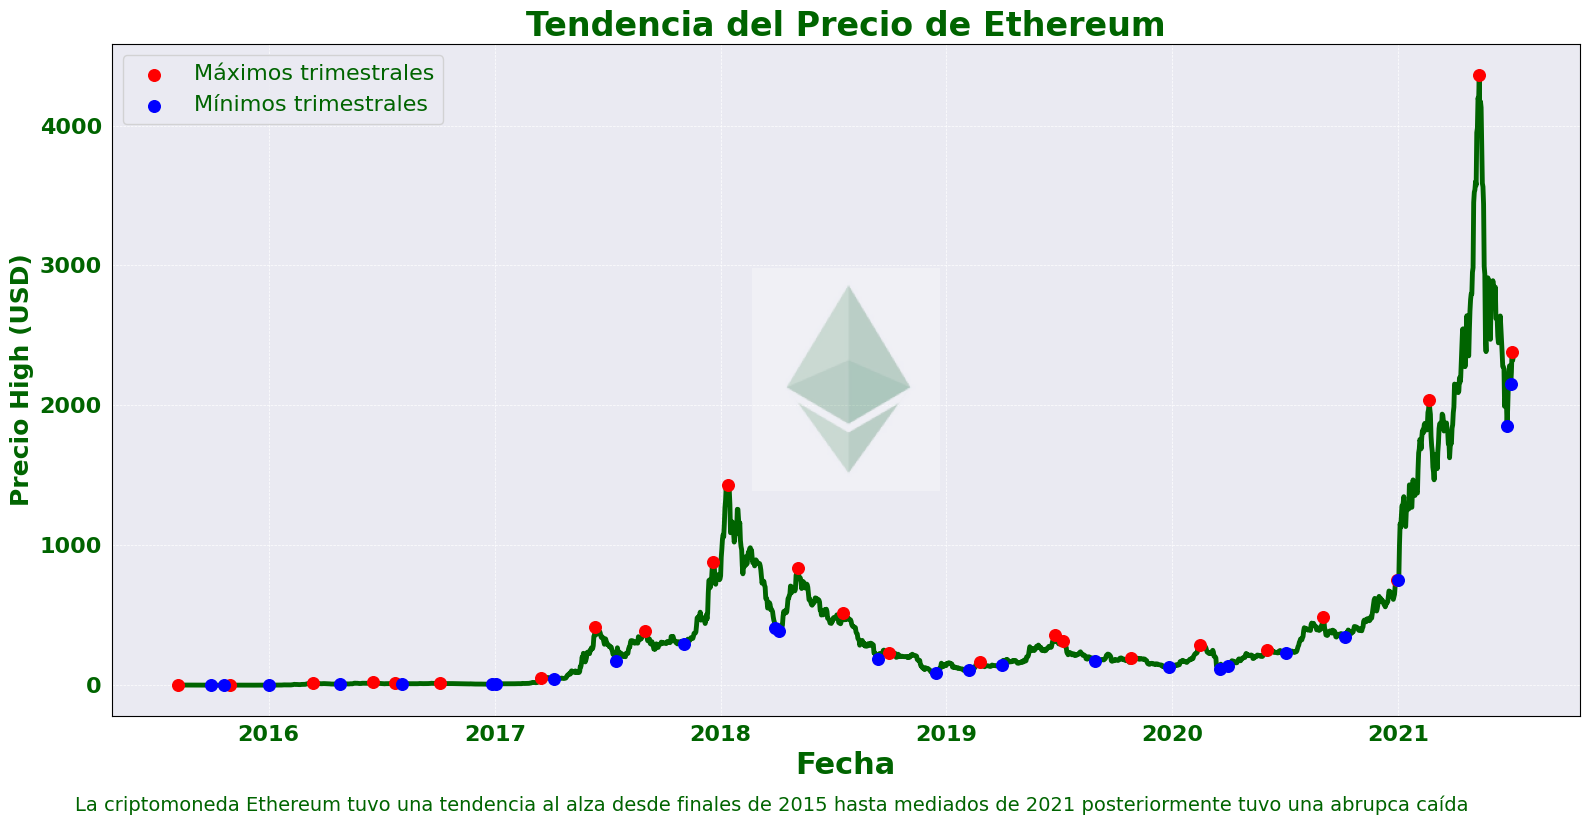

In [ ]:

#Tomar indice para el gráfico
ethereum.index = pd.to_datetime(ethereum.index)
# Creamos el estilo
sns.set_style("darkgrid")  # Fondo gris con rejilla sutil

# Descargar el logo de la criptomoneda
url = "https://i.postimg.cc/Hncz0sm3/Captura-de-pantalla-2025-05-07-162220.png"
urllib.request.urlretrieve(url, "logo.png")
logo_img = mpimg.imread("logo.png")


# Agrupar por trimestres y obtener máximos y mínimos
trimestral = ethereum.resample('QE').agg({'High': ['idxmax', 'idxmin']})
idx_max = trimestral['High']['idxmax']
idx_min = trimestral['High']['idxmin']

# Extraer valores
puntos_max = ethereum.loc[idx_max]
puntos_min = ethereum.loc[idx_min]

# Creamos la grafica
fig, ax = plt.subplots(figsize=(16, 8))

# Ponemos la linea de color verde
sns.lineplot(x=ethereum.index, y="High", data=ethereum, ax=ax,
             color="darkgreen", linewidth=3.5)

# Puntos rojos (máximos) y verdes (mínimos) trimestrales
ax.scatter(puntos_max.index, puntos_max['High'], color='red',
           s=70, zorder=5, label="Máximos trimestrales")
ax.scatter(puntos_min.index, puntos_min['High'], color='blue',
           s=70, zorder=5, label="Mínimos trimestrales")


# Ponemos el logo en el centro
imagebox = OffsetImage(logo_img, zoom=.9, alpha=0.3)
ab = AnnotationBbox(imagebox, (0.5, 0.5), xycoords='axes fraction',
                    box_alignment=(0.5, 0.5), frameon=False)
ax.add_artist(ab)

# Ponemos los titulos de los ejes
plt.title("Tendencia del Precio de Ethereum", fontsize=24,
          fontweight='semibold', color='darkgreen')
ax.set_xlabel("Fecha", fontsize=22, weight='bold', color="darkgreen")
ax.set_ylabel("Precio High (USD)", fontsize=18, weight='bold',
              color="darkgreen")
ax.tick_params(labelsize=12, colors="darkgreen")

#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=16, color='darkgreen',fontweight='bold')
plt.yticks(fontsize=16, color='darkgreen',fontweight='bold')

# Interpretación debajo del gráfico
plt.figtext(0.05, -0.02,
            "La criptomoneda Ethereum "
            "tuvo una tendencia al alza "
            "desde finales de 2015 "
            "hasta mediados de 2021 "
            "posteriormente tuvo una abrupca caída" ,
            fontsize=14, color='darkgreen')

#Ponemos el marco con lineas de color negro
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
#Mostramos la grafica
legend = plt.legend(fontsize=16, labelcolor='darkgreen')
plt.show()

La gráfica muestra la evolución del precio máximo diario de Ethereum entre 2015 y 2021. Se observa un primer pico en 2018, seguido de una caída prolongada y, posteriormente, un fuerte repunte a inicios de 2021, cuando alcanzó su máximo histórico por encima de los 4,000 USD.



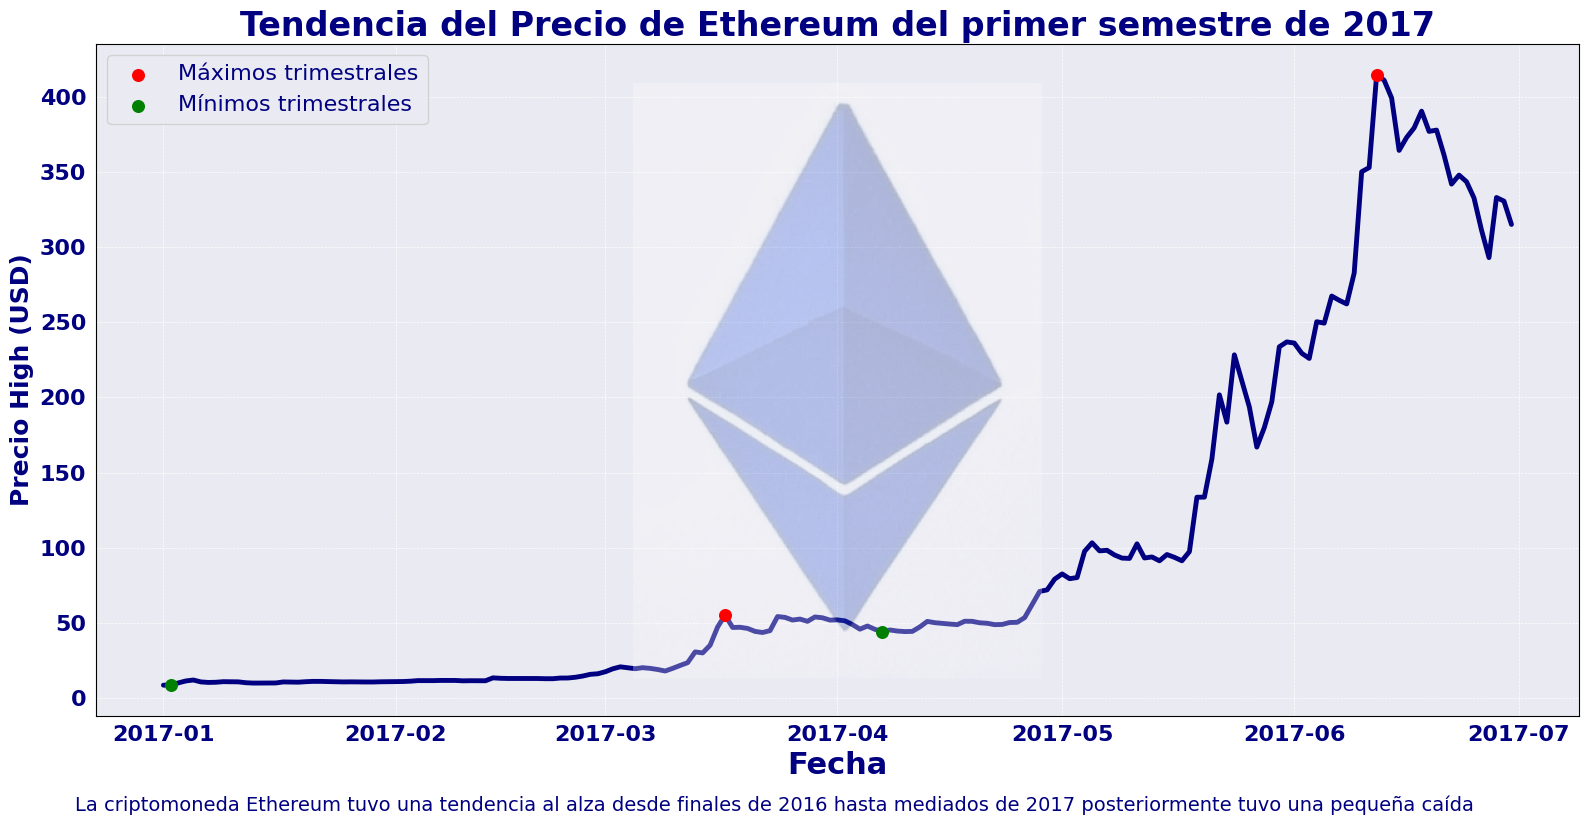

In [ ]:
# Filtrarmos los datos de enero a junio 2017
df_et_2017 = ethereum.loc[pd.to_datetime("2017-01-01")
             :pd.to_datetime("2017-06-30")]
# Creamos el estilo
sns.set_style("darkgrid")  # Fondo gris con rejilla sutil

# Descargar el logo de la criptomoneda
url = "https://i.postimg.cc/xd01wPck/Captura-de-pantalla-2025-05-08-213453.png"
urllib.request.urlretrieve(url, "logo.png")
logo_img = mpimg.imread("logo.png")


# Agrupar por trimestres y obtener máximos y mínimos
trimestral = df_et_2017 .resample('QE').agg({'High': ['idxmax', 'idxmin']})
idx_max = trimestral['High']['idxmax']
idx_min = trimestral['High']['idxmin']

# Extraer valores
puntos_max = df_et_2017 .loc[idx_max]
puntos_min = df_et_2017 .loc[idx_min]

# Creamos la grafica
fig, ax = plt.subplots(figsize=(16, 8))

# Ponemos la linea de color verde
sns.lineplot(x=df_et_2017.index, y="High", data=df_et_2017 , ax=ax,
             color="navy", linewidth=3.5)

# Puntos rojos (máximos) y verdes (mínimos) trimestrales
ax.scatter(puntos_max.index, puntos_max['High'], color='red',
           s=70, zorder=5, label="Máximos trimestrales")
ax.scatter(puntos_min.index, puntos_min['High'], color='green',
           s=70, zorder=5, label="Mínimos trimestrales")


# Ponemos el logo en el centro
imagebox = OffsetImage(logo_img, zoom=.9, alpha=0.3)
ab = AnnotationBbox(imagebox, (0.5, 0.5), xycoords='axes fraction',
                    box_alignment=(0.5, 0.5), frameon=False)
ax.add_artist(ab)

# Ponemos los titulos de los ejes
plt.title("Tendencia del Precio de Ethereum del primer semestre de 2017"
          , fontsize=24,
          fontweight='semibold', color='navy')
ax.set_xlabel("Fecha", fontsize=22, weight='bold', color="navy")
ax.set_ylabel("Precio High (USD)", fontsize=18, weight='bold',
              color="navy")
ax.tick_params(labelsize=12, colors="navy")

#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=16, color='navy',fontweight='bold')
plt.yticks(fontsize=16, color='navy',fontweight='bold')

# Interpretación debajo del gráfico
plt.figtext(0.05, -0.02,
            "La criptomoneda Ethereum "
            "tuvo una tendencia al alza "
            "desde finales de 2016 "
            "hasta mediados de 2017 "
            "posteriormente tuvo una pequeña caída" ,
            fontsize=14, color='navy')

#Ponemos el marco con lineas de color negro
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
#Mostramos la grafica
legend = plt.legend(fontsize=16, labelcolor='navy')
plt.show()

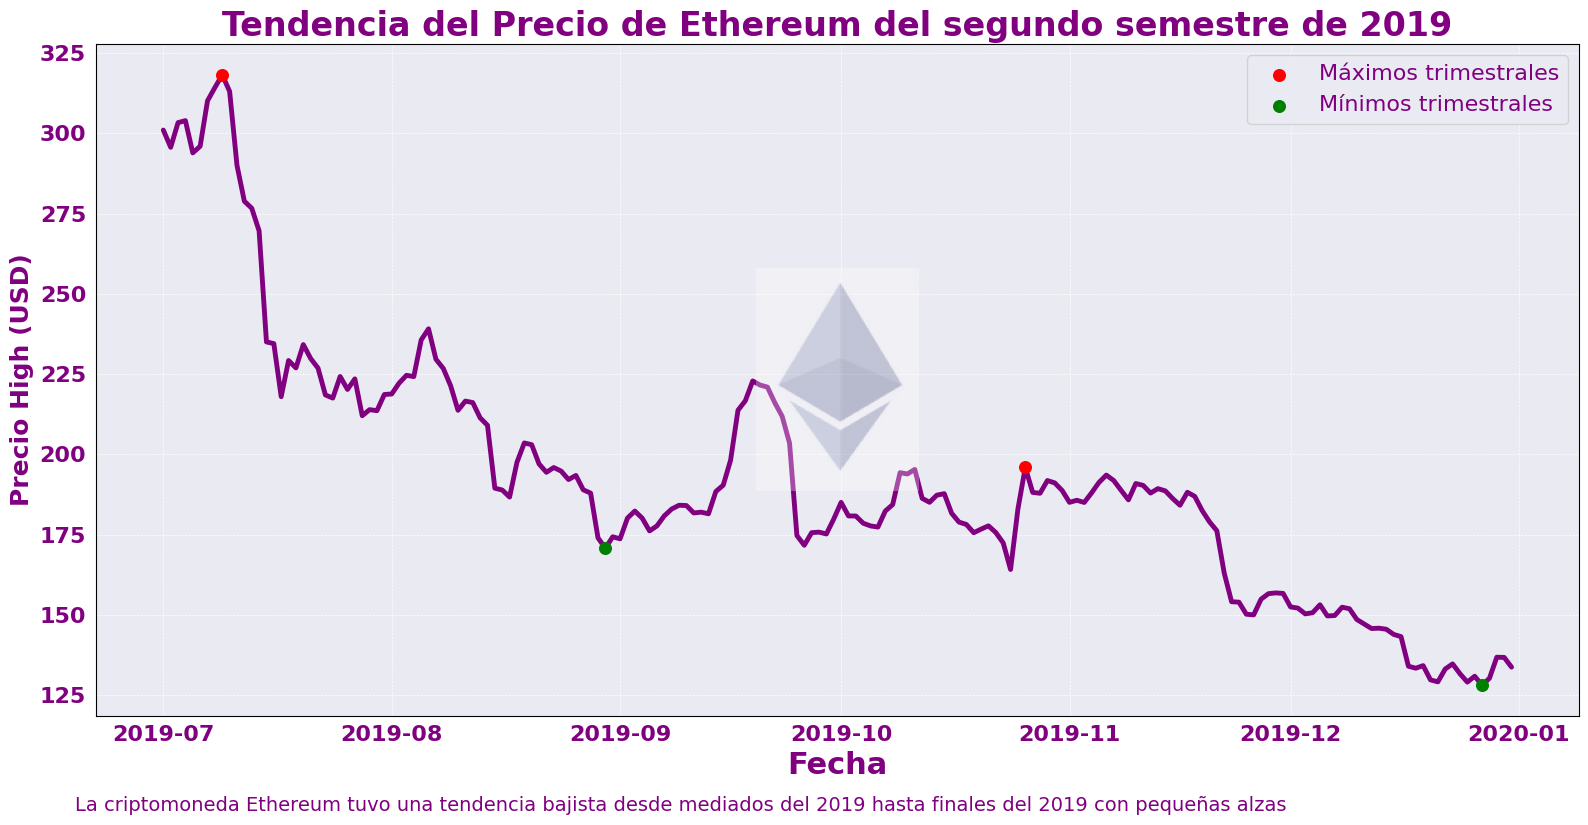

In [ ]:
# Filtrarmos los datos de enero a junio 2017
df_et_2017 = ethereum.loc[pd.to_datetime("2019-07-01")
             :pd.to_datetime("2019-12-31")]
# Creamos el estilo
sns.set_style("darkgrid")  # Fondo gris con rejilla sutil

# Descargar el logo de la criptomoneda
url = "https://i.postimg.cc/qMz73pMt/Captura-de-pantalla-2025-05-07-171837.png"
urllib.request.urlretrieve(url, "logo.png")
logo_img = mpimg.imread("logo.png")


# Agrupar por trimestres y obtener máximos y mínimos
trimestral = df_et_2017 .resample('QE').agg({'High': ['idxmax', 'idxmin']})
idx_max = trimestral['High']['idxmax']
idx_min = trimestral['High']['idxmin']

# Extraer valores
puntos_max = df_et_2017 .loc[idx_max]
puntos_min = df_et_2017 .loc[idx_min]

# Creamos la grafica
fig, ax = plt.subplots(figsize=(16, 8))

# Ponemos la linea de color verde
sns.lineplot(x=df_et_2017.index, y="High", data=df_et_2017 , ax=ax,
             color="purple", linewidth=3.5)

# Puntos rojos (máximos) y verdes (mínimos) trimestrales
ax.scatter(puntos_max.index, puntos_max['High'], color='red',
           s=70, zorder=5, label="Máximos trimestrales")
ax.scatter(puntos_min.index, puntos_min['High'], color='green',
           s=70, zorder=5, label="Mínimos trimestrales")


# Ponemos el logo en el centro
imagebox = OffsetImage(logo_img, zoom=.9, alpha=0.3)
ab = AnnotationBbox(imagebox, (0.5, 0.5), xycoords='axes fraction',
                    box_alignment=(0.5, 0.5), frameon=False)
ax.add_artist(ab)

# Ponemos los titulos de los ejes
plt.title("Tendencia del Precio de Ethereum del segundo semestre de 2019"
          , fontsize=24,
          fontweight='semibold', color='purple')
ax.set_xlabel("Fecha", fontsize=22, weight='bold', color="purple")
ax.set_ylabel("Precio High (USD)", fontsize=18, weight='bold',
              color="purple")
ax.tick_params(labelsize=12, colors="purple")

#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=16, color='purple',fontweight='bold')
plt.yticks(fontsize=16, color='purple',fontweight='bold')

# Interpretación debajo del gráfico
plt.figtext(0.05, -0.02,
            "La criptomoneda Ethereum "
            "tuvo una tendencia bajista "
            "desde mediados del 2019 "
            "hasta finales del 2019 "
            "con pequeñas alzas" ,
            fontsize=14, color='purple')

#Ponemos el marco con lineas de color negro
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
#Mostramos la grafica
legend = plt.legend(fontsize=16, labelcolor='purple')
plt.show()

---
#**c) Definición de la variable objetivo (Variable Y)**:💰
---

Se sabe que

*   **Date**:Fecha de la operación
*   **SNo**: Serial Numbre (Número de serie)
*   **Name**: Nombre de la criptomoneda (Ethereum)
*   **Symbol**: Simbolo de la criptomoneda (ETH)
*   **High**: máximo precio tranzado
*   **Low**: mínimo precio tranzado
*   **Open**: precio de apertura
*   **Close**: precio de cierre
*   **Volume**: Dinero tranzado
*   **Market Cap**: Capital de la criptomoneda en dolares.

Se define la variable objetivo como $y=\text{High}$  asi se buscará predecir el precio máximo de Ethereum para un día futuro, con los datos históricos que proporcionó el profesor

In [ ]:
#Se define la variable objetivo como
Y=df.head(10).style.background_gradient(subset=['High'], cmap='autumn')
Y

In [ ]:
#Variables objetivo 'High' maximo precio tranzado
y=ethereum['High']
y

Date
2015-08-08       2.7988
2015-08-09       0.8798
2015-08-10       0.7299
2015-08-11       1.1314
2015-08-12       1.2899
                ...    
2021-07-02   2,155.5965
2021-07-03   2,237.5672
2021-07-04   2,384.2869
2021-07-05   2,321.9228
2021-07-06   2,346.2949
Name: High, Length: 2160, dtype: float64

In [ ]:
print(f"High tuvo su valor máximo con {round(ethereum['High'].max(),4)} $ y su valor mínimo con {round(ethereum['High'].min(),4)} $ ")

High tuvo su valor máximo con 4362.3505 $ y su valor mínimo con 0.483 $ 


In [ ]:
#'High' datos estadísticos
ethereum['High'].describe()

count   2,160.0000
mean      398.2586
std       628.0823
min         0.4830
25%        14.2652
50%       205.1246
75%       396.4946
max     4,362.3505
Name: High, dtype: float64

---
#**d) Análisis de la serie temporal:**📈
---

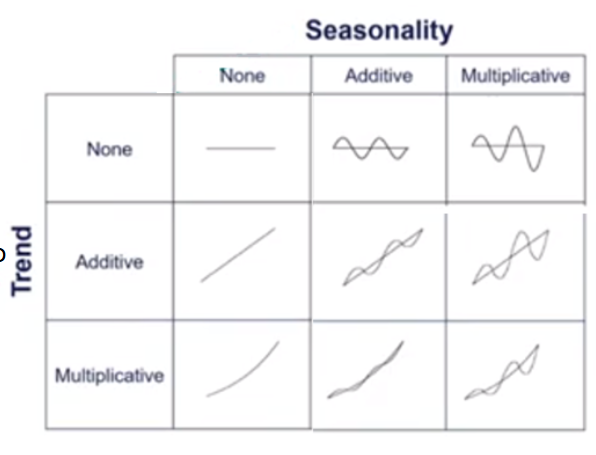

Creamos una clase en Python que nos permitirá analizar la serie temporal de manera más eficiente. Esta clase incluye la generación del gráfico de seasonal_decompose, la ejecución del test de Dickey-Fuller y un gráfico para el análisis de autocorrelación

In [ ]:
class analizar_serie:
  def __init__(self, fecha_inicio, fecha_final, dataframe, desface):
    self.fecha_inicio = fecha_inicio
    self.fecha_final = fecha_final
    self.dataframe = dataframe
    self.df_et_analisis = None
    self.desface = desface

  def graficos_serie(self):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from statsmodels.tsa.seasonal import seasonal_decompose

    # Filtrar el DataFrame por fechas
    self.df_et_analisis = self.dataframe.loc[pd.to_datetime(self.fecha_inicio)
             :pd.to_datetime(self.fecha_final)]

    # Estilo personalizado
    sns.set_style("whitegrid")
    plt.rcParams.update({'font.size': 12, 'axes.labelcolor': 'dimgray', 'xtick.color': 'gray', 'ytick.color': 'gray'})

    # Descomposición estacional
    decomp = seasonal_decompose(self.df_et_analisis["High"], model='additive')

    # Crear subplots organizados
    fig, axs = plt.subplots(4, 1, figsize=(14, 10), sharex=True)
    fig.suptitle("Descomposición de la Serie Temporal del Precio Alto de Ethereum", fontsize=18, fontweight='bold', color='firebrick')

    # Observado
    axs[0].plot(decomp.observed, color='teal')
    axs[0].set_ylabel("Observado", fontsize=12)
    axs[0].grid(True)

    # Tendencia
    axs[1].plot(decomp.trend, color='darkorange')
    axs[1].set_ylabel("Tendencia", fontsize=12)
    axs[1].grid(True)

    # Estacional
    axs[2].plot(decomp.seasonal, color='seagreen')
    axs[2].set_ylabel("Estacionalidad", fontsize=12)
    axs[2].grid(True)

    # Residuo
    axs[3].plot(decomp.resid, color='slateblue')
    axs[3].set_ylabel("Residuo", fontsize=12)
    axs[3].set_xlabel("Fecha")
    axs[3].grid(True)

    plt.xticks(rotation=45)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

  def test_p_value(self):

    fuller_test = adfuller(self.df_et_analisis["High"])
    print('P-value', fuller_test[1])
    print('*------------------------------------------------------*')
    if fuller_test[1]<0.01:
      print('rechazar hipotesis nula, los datos son estacionales')
    else:
      print('no rechzar la hipotesis nula, los datos no son estacionarios')
    return print('*------------------------------------------------------*')

  def desfazar_serie(self):
    self.df_et_analisis[f"{self.desface}st_dif"] = self.df_et_analisis["High"] - self.desface * self.df_et_analisis["High"].shift(self.desface)
    return self.df_et_analisis[f"{self.desface}st_dif"].plot()

  def test_p_value_2(self):

    fuller_test = adfuller(self.df_et_analisis[f"{self.desface}st_dif"].dropna())
    print('P-value', fuller_test[1])
    print('*------------------------------------------------------*')
    if fuller_test[1]<0.01:
      print('rechazar hipotesis nula, los datos son estacionales')
    else:
      print('no rechzar la hipotesis nula, los datos no son estacionarios')
    return print('*------------------------------------------------------*')

  def analisis_autocorrelacion(self):
    diff = plot_acf(self.df_et_analisis[f"{self.desface}st_dif"].dropna())
    return print(f"Analisis de Autocorrelación con {self.desface} desface")

  def Arima(self):
    fecha_inicial = pd.to_datetime(self.fecha_inicio)
    fecha_final = pd.to_datetime(self.fecha_final)
    dias_a_quitar = 45
    diferencia = datetime.timedelta(days=dias_a_quitar)
    fecha_anterior = fecha_inicial - diferencia
    ethereum_periodo = self.dataframe.loc[fecha_anterior : self.fecha_final]
    mod = ARIMA(ethereum_periodo['High'], order=(5,0,5))
    res = mod.fit()
    fig, ax = plt.subplots()
    ax = ethereum_periodo['High'].loc[fecha_anterior:].plot(ax=ax)
    fig=plot_predict(res, start = self.fecha_inicio, end = self.fecha_final, ax=ax)
    return plt.show()


Empezaremos por analizar el periodo que abarca del primero de Enero del 2017 al 31 de Marzo del 2017, pues en la grafica podemos observar que durante este periodo la serie presento una pequeña tendencia al alza.

In [ ]:
analsis_3M2017 = analizar_serie("2017-01-01", "2017-03-31", ethereum, 1)

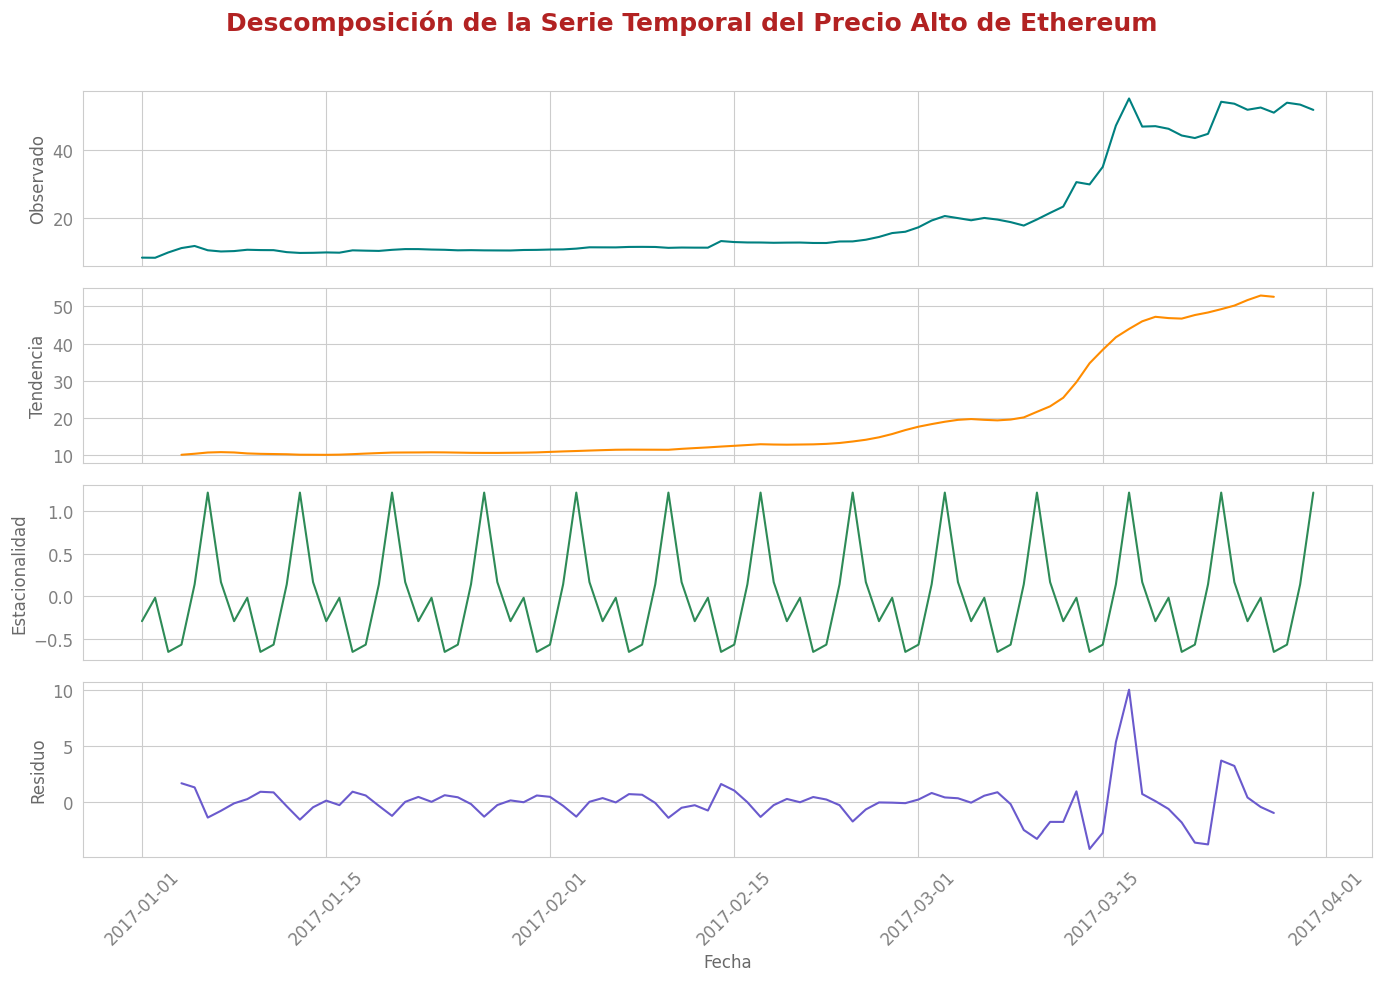

In [ ]:
analsis_3M2017.graficos_serie()

En la gráfica del componente observado, se aprecia un incremento progresivo y acelerado a partir de mediados de marzo, lo que sugiere un cambio estructural en el comportamiento del precio. La tendencia refleja este crecimiento sostenido, confirmando que el alza no es únicamente ruido temporal sino una dinámica subyacente. El componente estacional exhibe un patrón repetitivo con oscilaciones regulares que indican una estacionalidad marcada a lo largo del trimestre.


Por último, el residuo mantiene valores bajos durante la mayor parte del período, salvo por un aumento notable hacia la segunda mitad de marzo, lo que podría atribuirse a eventos puntuales no explicados por la tendencia o la estacionalidad. En conjunto, esta descomposición sugiere que la serie presenta tanto una estructura cíclica como una tendencia creciente, siendo útil para modelado y predicción futura mediante el modelo ARIMA.

In [ ]:
analsis_3M2017.test_p_value()

P-value 0.9881769331606655
*------------------------------------------------------*
no rechzar la hipotesis nula, los datos no son estacionarios
*------------------------------------------------------*


<ipython-input-17-754505cce937>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_et_analisis[f"{self.desface}st_dif"] = self.df_et_analisis["High"] - self.desface * self.df_et_analisis["High"].shift(self.desface)


<Axes: xlabel='Date'>

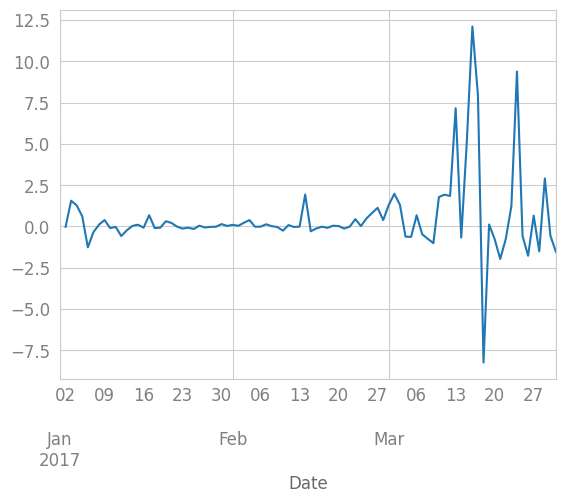

In [ ]:
analsis_3M2017.desfazar_serie()

La gráfica muestra la serie diferenciada del precio alto de Ethereum en el primer trimestre de 2017. Durante enero y febrero, las variaciones son mínimas, lo que indica estabilidad. A partir de marzo, se observa un aumento en la volatilidad, con fuertes alzas y bajas en el precio de la acción. Esto sugiere un cambio en el comportamiento del mercado, posiblemente impulsado por eventos externos o un aumento en la especulación.



In [ ]:
analsis_3M2017.test_p_value_2()

P-value 2.0543024161428604e-09
*------------------------------------------------------*
rechazar hipotesis nula, los datos son estacionales
*------------------------------------------------------*


Analisis de Autocorrelación con 1 desface


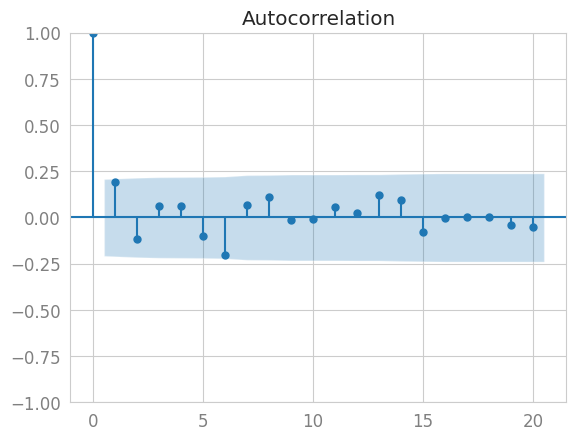

In [ ]:
analsis_3M2017.analisis_autocorrelacion()

La gráfica de autocorrelación muestra que, tras aplicar una primera diferencia, no existen correlaciones significativas entre los rezagos, ya que todos los puntos caen dentro del intervalo de confianza. Esto indica que la serie diferenciada se comporta como "ruido blanco", lo cual es una señal positiva para la estacionariedad del modelo.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


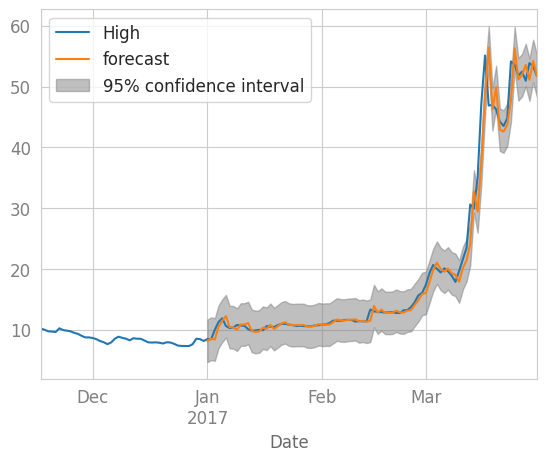

In [ ]:
analsis_3M2017.Arima()

Para nuestro segundo analisis tomaremos el periodo que abarca 1ro de Octubre del 2019 al 31 de Diciembre del 2019, durante este periodo se observa un comportamiento estable.

In [ ]:
analisis_3M2019 = analizar_serie("2019-9-01", "2019-12-31", ethereum, 1)

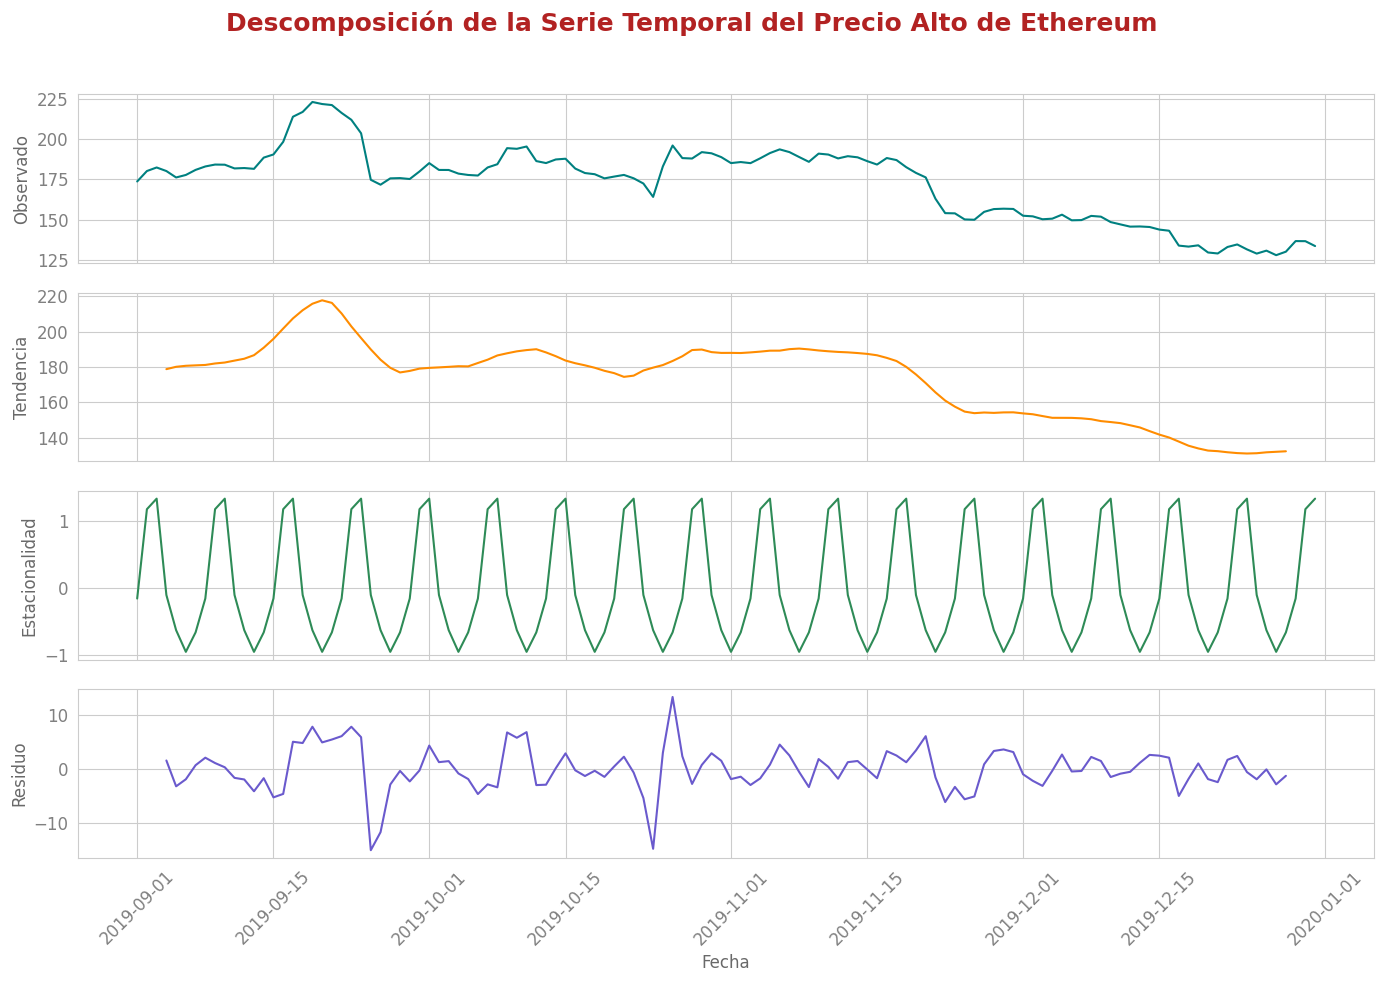

In [ ]:
analisis_3M2019.graficos_serie()

En el periodo mostrado de 2019, el precio alto de Ethereum presenta una tendencia descendente, especialmente marcada a partir de noviembre. La componente estacional mantiene un patrón periódico definido, indicando una estacionalidad consistente. El componente de residuos muestra algunos modificaciones moderadas, con un pico aislado a mediados de octubre, pero en general se mantiene sin variaciones extremas.

Esta descomposición sugiere una caída sostenida en el precio, acompañada de estacionalidad clara y ruido relativamente controlado.

In [ ]:
analisis_3M2019.test_p_value()

P-value 0.6410091826173087
*------------------------------------------------------*
no rechzar la hipotesis nula, los datos no son estacionarios
*------------------------------------------------------*


<ipython-input-17-754505cce937>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_et_analisis[f"{self.desface}st_dif"] = self.df_et_analisis["High"] - self.desface * self.df_et_analisis["High"].shift(self.desface)


<Axes: xlabel='Date'>

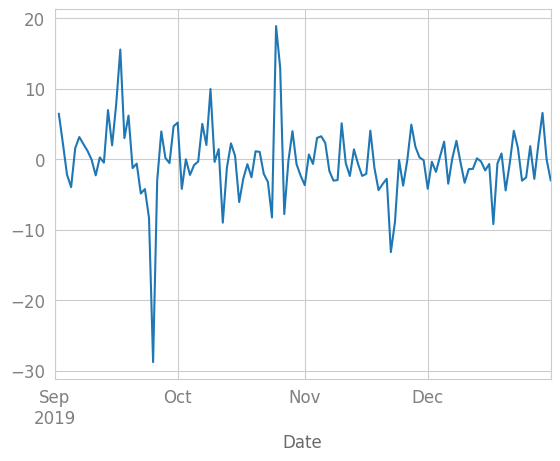

In [ ]:
 analisis_3M2019.desfazar_serie()

La serie diferenciada revela una mayor volatilidad durante septiembre y octubre, con cambios abruptos que alcanzan valores extremos tanto positivos como negativos. A partir de noviembre, las modificaciones se estabilizan, mostrando variaciones más acotadas en torno a cero.

Este comportamiento sugiere que, aunque el mercado fue inicialmente inestable, tendió hacia una mayor regularidad en los últimos meses del año.



In [ ]:
analisis_3M2019.test_p_value_2()

P-value 4.329492172153421e-13
*------------------------------------------------------*
rechazar hipotesis nula, los datos son estacionales
*------------------------------------------------------*


Analisis de Autocorrelación con 1 desface


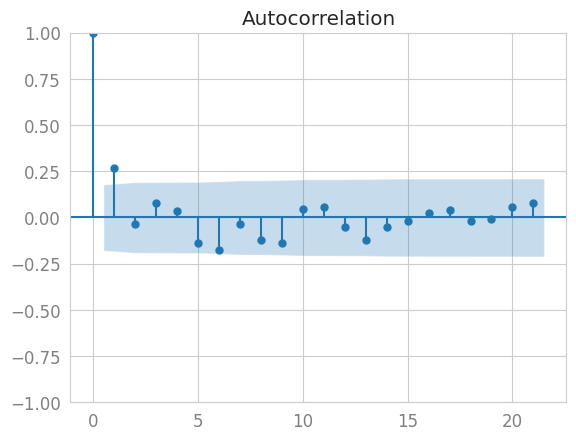

In [ ]:
analisis_3M2019.analisis_autocorrelacion()

La gráfica de autocorrelación muestra que, tras aplicar un desfase de 1 , no se observan correlaciones significativas entre los rezagos, ya que todos los puntos se encuentran dentro del intervalo de confianza.

La serie diferenciada carece de dependencia temporal clara, lo cual es un buen indicio de que se ha logrado la estacionariedad necesaria para aplicar modelos como ARIMA.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


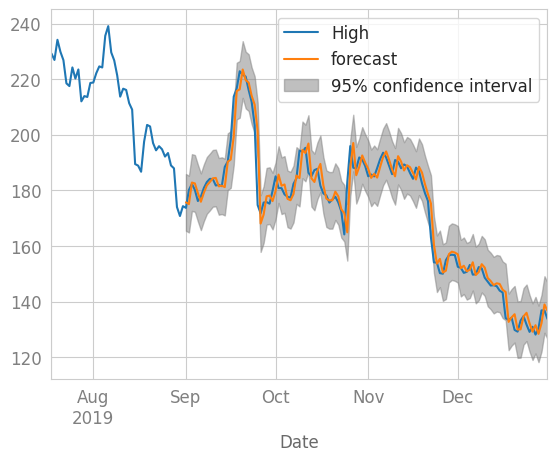

In [ ]:
analisis_3M2019.Arima()

El modelo ARIMA genera un pronóstico del precio alto de Ethereum con una banda de confianza del 95%. La línea de predicción (en naranja) sigue el comportamiento de la serie observada, aunque presenta peuqeñas desviaciones visibles en periodos con alta volatilidad.

La banda gris refleja mayor incertidumbre hacia finales del periodo, lo que es común en predicciones más alejadas. El modelo logra capturar la tendencia general decreciente del precio.

Por último, tomaremos el periodo comprendido entre el 1 de enero y el 31 de marzo de 2021, ya que durante estos meses se observó un aumento significativamente mayor en la gráfica.

In [ ]:
analisis_3M2021 = analizar_serie("2021-01-1", "2021-03-31", ethereum, 1)

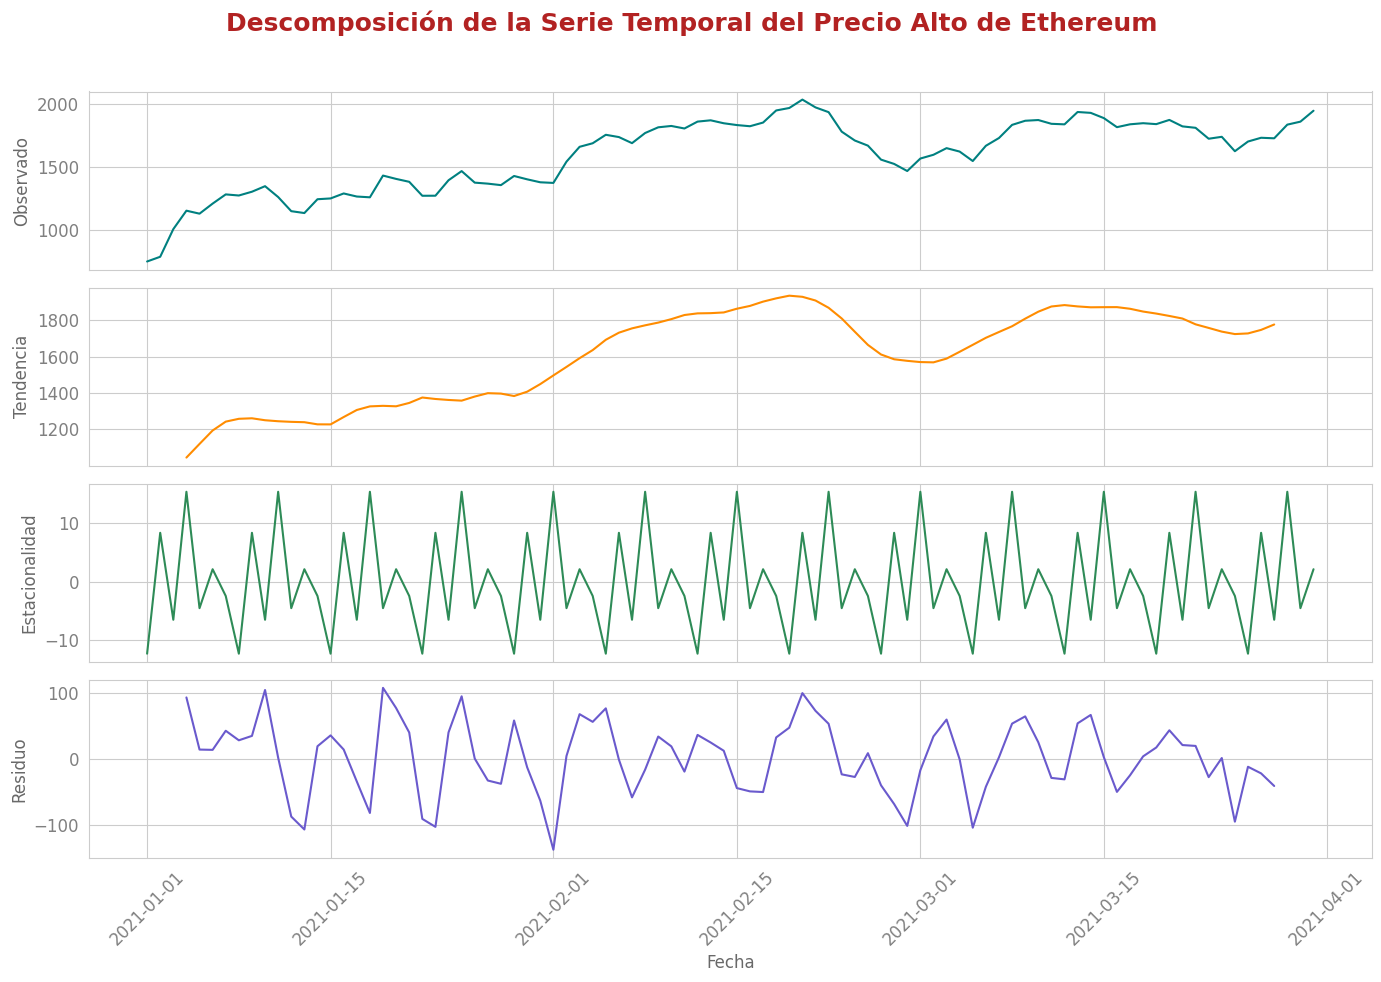

In [ ]:
analisis_3M2021.graficos_serie()

La serie observada muestra una fuerte tendencia alcista en los precios de Ethereum durante el periodo, con algunos ajustes hacia mediados de febrero y marzo. La componente de tendencia confirma este crecimiento sostenido, con leves retrocesos temporales.

La estacionalidad es clara y se repite con frecuencia regular, lo que indica patrones de comportamiento consistentes en intervalos cortos. Finalmente, los residuos muestran oscilaciones amplias, lo que sugiere la presencia de eventos atípicos o alta volatilidad no explicada por la tendencia ni la estacionalidad.

In [ ]:
analisis_3M2021.test_p_value()

P-value 0.05840325536756877
*------------------------------------------------------*
no rechzar la hipotesis nula, los datos no son estacionarios
*------------------------------------------------------*


<ipython-input-17-754505cce937>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_et_analisis[f"{self.desface}st_dif"] = self.df_et_analisis["High"] - self.desface * self.df_et_analisis["High"].shift(self.desface)


<Axes: xlabel='Date'>

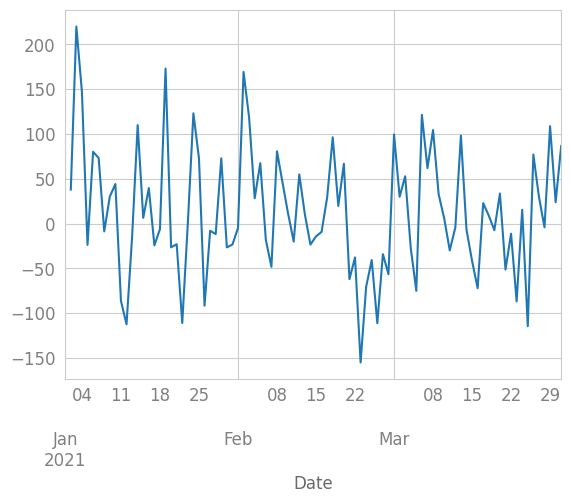

In [ ]:
analisis_3M2021.desfazar_serie()

La serie diferenciada del 2021 tiene mayor volatilidad en todo el periodo, con cambios bruscos tanto positivos como negativos. Aunque no se observa una dirección clara, se aprecian ciclos frecuentes de subidas y bajadas intensas, en enero y marzo.

Este comportamiento sugiere un mercado muy activo y sensible a eventos externos, lo que podría dificultar la predicción precisa sin modelos que consideren dicha variabilidad.

In [ ]:
analisis_3M2021.test_p_value_2()

P-value 6.577608238450346e-11
*------------------------------------------------------*
rechazar hipotesis nula, los datos son estacionales
*------------------------------------------------------*


Analisis de Autocorrelación con 1 desface


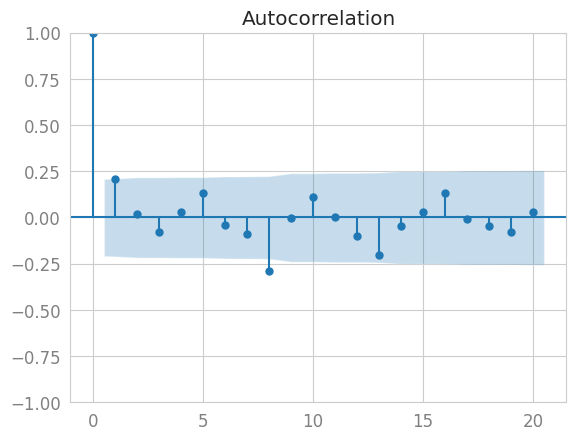

In [ ]:
analisis_3M2021.analisis_autocorrelacion()

La gráfica muestra que no hay autocorrelaciones significativas en los primeros 20 rezagos, ya que todos los valores están dentro del intervalo de confianza.

Tras aplicar el desfase, la serie se comporta como ruido blanco, lo cual sugiere que la serie es estacionaria y está lista para el ajuste de modelos como ARIMA.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


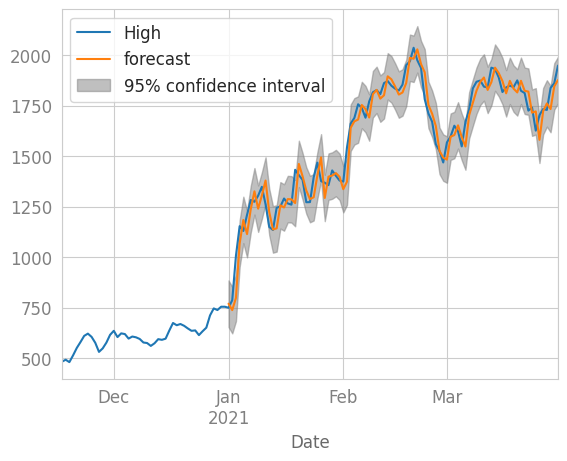

In [ ]:
analisis_3M2021.Arima()

El modelo ARIMA logra capturar con precisión la tendencia alcista del precio alto de Ethereum durante el periodo. La línea de pronóstico (en naranja) sigue de cerca la serie, y el intervalo de confianza del 95% (en gris) se mantiene ajustado, lo que indica un bajo nivel de incertidumbre.

A pesar de algunos picos abruptos, el modelo muestra un buen ajutes para el precio de Ethereum en 2021 donde existió un fuerte crecimiento y alta volatilidad.

---
#**e) Análisis estadístico y visual:**📊
---

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


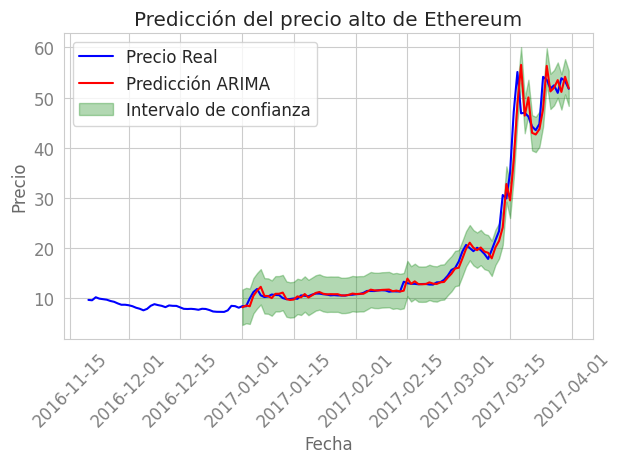

In [ ]:
ethereum_periodo = ethereum.loc["2016-11-20":"2017-03-31"]
mod = ARIMA(ethereum_periodo['High'], order=(5, 0, 5))
res = mod.fit()
fig, ax = plt.subplots()
# Graficar los datos reales en azul
ax.plot(ethereum_periodo['High'], color='blue', label='Precio Real')
pred = res.get_prediction(start="2017-01-01", end="2017-03-31")
pred_mean = pred.predicted_mean
conf_int = pred.conf_int()
# Graficar la predicción en rojo
ax.plot(pred_mean.index, pred_mean, color='red', label='Predicción ARIMA')

# Graficar el intervalo de confianza en verde
ax.fill_between(pred_mean.index,
                conf_int.iloc[:, 0],
                conf_int.iloc[:, 1],
                color='green', alpha=0.3, label='Intervalo de confianza')


ax.legend()
plt.title('Predicción del precio alto de Ethereum')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


La gráfica muestra la predicción del precio alto de Ethereum utilizando un modelo ARIMA. La línea azul representa el precio real, mientras que la línea roja corresponde a la predicción del modelo. El intervalo verde indica el rango de confianza al 95%. El modelo ARIMA logra seguir adecuadamente la tendencia general, incluso durante el fuerte repunte a mediados de marzo de 2017. Aunque hay cierta desviación en momentos de alta volatilidad, la predicción se mantiene dentro del intervalo de confianza, lo que indica un ajuste razonable para ese periodo.

Podemos ver los siguientes elementos de la grafica

* $x=$ "High" (Línea azul):

    Representa el precio histórico real de Ethereum (en su valor más alto del día).

    Se observa que desde noviembre de 2016 hasta abril de 2017 hubo un crecimiento importante, especialmente desde marzo de 2017.

* $y=$ Predicción ARIMA (Línead roja):

    Es el valor estimado del precio "High" diario generado por el modelo ARIMA.

    Sigue de cerca la línea azul, lo que indica un buen ajuste del modelo a los datos.

* Zona verde sombreada - Intervalo de confianza:

    Representa la incertidumbre del modelo (posibles errores).

    Abarca un rango donde, estadísticamente, se espera que esté el precio real con alta probabilidad (normalmente 95%).

    Es más ancha cuando hay más volatilidad (por ejemplo, durante el gran salto en marzo de 2017).

In [ ]:
ethereum_periodo['High'].describe()

count   132.0000
mean     16.3617
std      13.3226
min       7.3226
25%       8.7495
50%      10.7675
75%      14.8261
max      55.1147
Name: High, dtype: float64

La variable High tiene un total de 132 observaciones. La media es de 16.36, lo que indica que, en promedio, los precios más altos observados en la serie temporal rondan ese valor. La desviación estándar de 13.32 sugiere que hay una considerable dispersión en torno a la media, lo que implica que los precios varían significativamente. El valor más bajo registrado es 7.32 y el más alto es 55.11, lo que demuestra que ha habido un rango amplio de precios en el periodo de análisis. El percentil 25 (8.75) y el percentil 75 (14.83) reflejan que el 50% de los valores de la serie se encuentran en un rango entre estos dos puntos, lo que proporciona una idea de la distribución central de los precios. La mediana (10.77) muestra que la mitad de los valores de la serie están por debajo de este valor, mientras que la otra mitad está por encima.

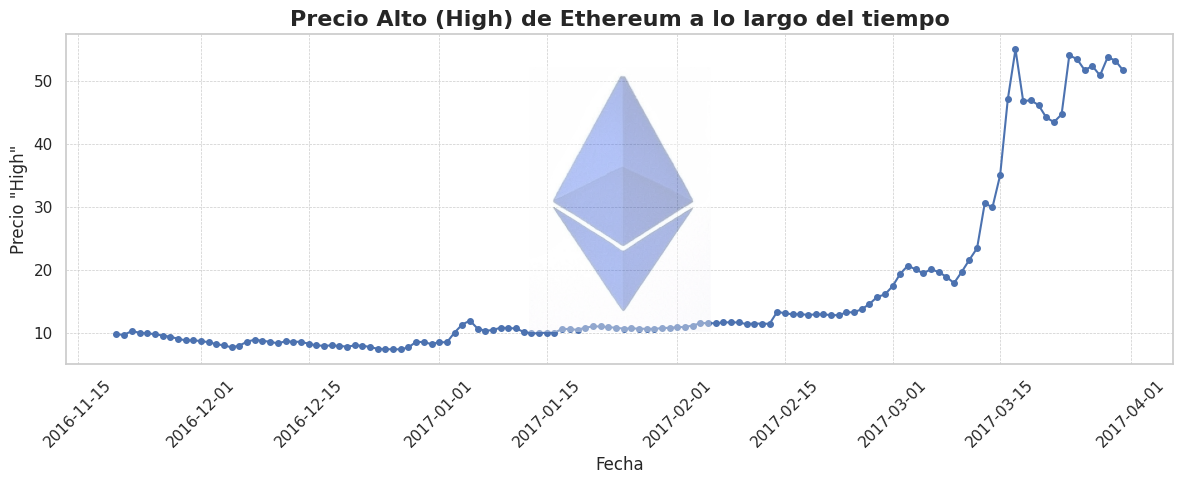

In [ ]:
# Establecemos un estilo
sns.set_theme(style="whitegrid")

# Descargamos el logo
url = "https://i.postimg.cc/xd01wPck/Captura-de-pantalla-2025-05-08-213453.png"
urllib.request.urlretrieve(url, "logo_azul.png")
logo_img = mpimg.imread("logo_azul.png")

# Creamoa la grafica
fig, ax = plt.subplots(figsize=(12, 5))

# Graficamos los datos
ax.plot(ethereum_periodo['High'], color='b', linestyle='-', marker='o',
        markersize=4)
ax.set_title('Precio Alto (High) de Ethereum a lo largo del tiempo',
             fontsize=16, fontweight='bold')
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Precio "High"', fontsize=12)

# Agregamos el logo centrado
imagebox = OffsetImage(logo_img, zoom=0.4, alpha=0.4)
ab = AnnotationBbox(imagebox, (0.5, 0.5), xycoords='axes fraction',
                    box_alignment=(0.5, 0.5), frameon=False)
ax.add_artist(ab)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
#Mostramos la grafica
plt.show()

Se observa que:
* Desde noviembre de 2016 hasta febrero de 2017, el precio fue relativamente estable entre 8 y 13 dólares.

* A partir de marzo de 2017, se ve un crecimiento fuerte y rápido, superando los 50 dólares.

* Este comportamiento sugiere un periodo de alta volatilidad o interés especulativo.



---
#**f) Explicación de los parámetros:**👨‍💻
---

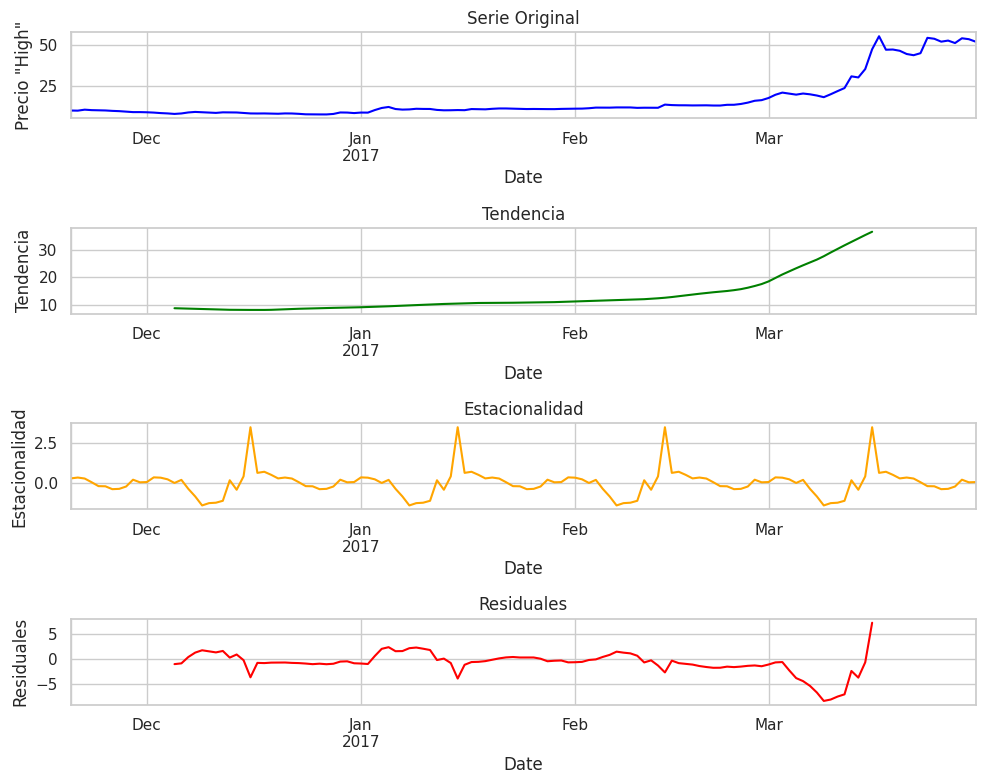

In [ ]:
# Descomponer la serie temporal
decompose_result = seasonal_decompose(ethereum_periodo['High'],
                                      model='additive', period=30)

# Ajustar los gráficos de la descomposición
fig, axes = plt.subplots(4, 1, figsize=(10, 8))

# Original
decompose_result.observed.plot(ax=axes[0], color='blue', title='Serie Original')
axes[0].set_ylabel('Precio "High"')

# Tendencia
decompose_result.trend.plot(ax=axes[1], color='green', title='Tendencia')
axes[1].set_ylabel('Tendencia')

# Estacionalidad
decompose_result.seasonal.plot(ax=axes[2], color='orange', title='Estacionalidad')
axes[2].set_ylabel('Estacionalidad')

# Residual
decompose_result.resid.plot(ax=axes[3], color='red', title='Residuales')
axes[3].set_ylabel('Residuales')

# Ajustes finales
plt.tight_layout()
plt.show()


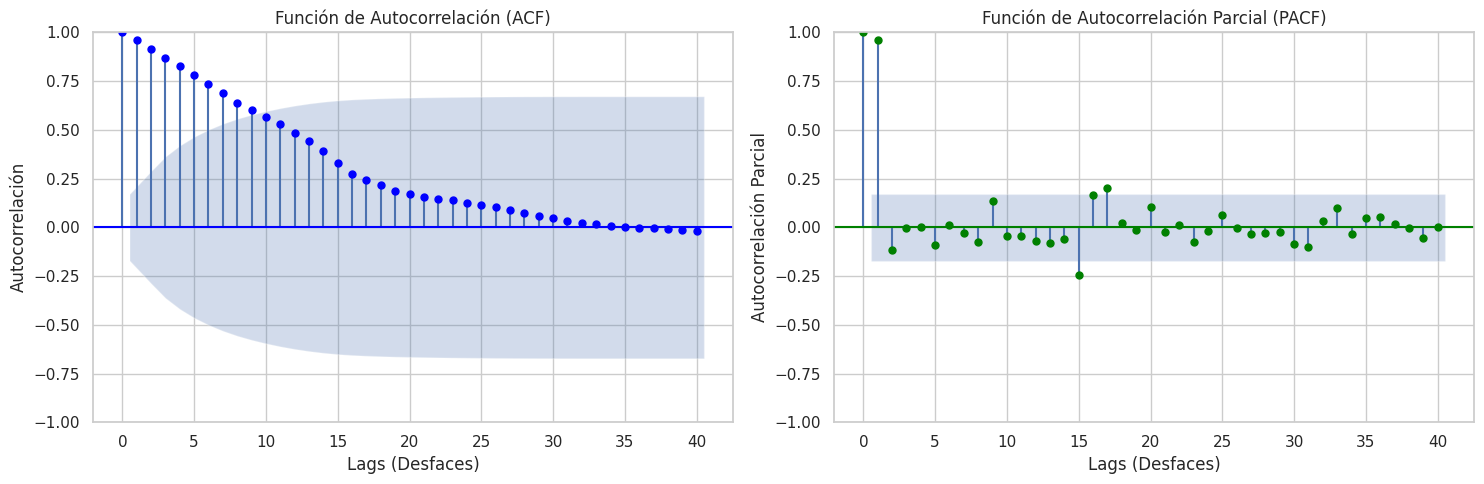

In [ ]:
# Crear los gráficos de ACF y PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# ACF
plot_acf(ethereum_periodo['High'], lags=40, ax=axes[0], color='blue',
         title='Función de Autocorrelación (ACF)')
axes[0].set_xlabel('Lags (Desfaces)')
axes[0].set_ylabel('Autocorrelación')

# PACF
plot_pacf(ethereum_periodo['High'], lags=40, ax=axes[1], color='green',
          title='Función de Autocorrelación Parcial (PACF)')
axes[1].set_xlabel('Lags (Desfaces)')
axes[1].set_ylabel('Autocorrelación Parcial')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()


* ACF (Función de Autocorrelación)
    Muestra un decaimiento lento y gradual, típico de un proceso AR (autoregresivo).

    Los valores son significativos hasta alrededor del lag 20, luego tienden a estar dentro del intervalo de confianza (área sombreada).

    El patrón sugiere persistencia a lo largo del tiempo, característica de series no estacionarias o con componente AR fuerte.

* PACF (Función de Autocorrelación Parcial)
    El valor significativo más notorio está en el lag 1, y tal vez algunos picos esporádicos menores.

    Después del primer rezago, la mayoría de los puntos están dentro del intervalo de confianza ⇒ esto sugiere que el componente AR se limita a uno o pocos rezagos.

In [ ]:
result = adfuller(ethereum_periodo['High'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 1.1619279119551187
p-value: 0.9957119908057169


ADF Statistic (Estadística ADF):
El valor de la estadística ADF es 1.1619. Este valor se compara con un valor crítico (dependiendo del nivel de significancia, como 1%, 5%, o 10%) para determinar si la serie temporal tiene una raíz unitaria.

p-value (Valor p):
El valor p es 0.9957. Un valor p alto (mucho mayor que 0.05) indica que no podemos rechazar la hipótesis nula, lo que sugiere que la serie temporal no es estacionaria.



---
#**g) Explicación de resultados:**🧠
---

In [ ]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                  132
Model:                 ARIMA(5, 0, 5)   Log Likelihood                -267.855
Date:                Mon, 12 May 2025   AIC                            559.711
Time:                        20:32:31   BIC                            594.304
Sample:                    11-20-2016   HQIC                           573.768
                         - 03-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8277     63.828      0.264      0.792    -108.272     141.928
ar.L1          1.6144      0.533      3.026      0.002       0.569       2.660
ar.L2         -0.8127      1.294     -0.628      0.5

En los resultados del modelo ARIMA$(5,0,5)$, se incluyen coeficientes autorregresivos (AR) y de medias móviles (MA) hasta el quinto rezago. El coeficiente const representa la constante del modelo, con un valor de $16.83$; sin embargo, su alta desviación estándar y p-valor elevado $(0.792)$ indican que no es significativamente diferente de cero, por lo que no contribuye de forma clara al ajuste. Dentro de los términos autorregresivos, el coeficiente ar.L1 $(1.61)$ es altamente significativo $(p = 0.002)$, lo que sugiere una fuerte dependencia del precio actual respecto al primer rezago. En cambio, los coeficientes ar.L2 a ar.L5 tienen p-valores superiores a $0.05$, lo que indica que su efecto no es estadísticamente significativo en este contexto.


 Por el lado de los términos de medias móviles, el único coeficiente significativo es ma.L4, con un valor de $-0.66$ y un p-valor de $0.019$, lo que indica que el componente de ruido del cuarto rezago tiene una influencia negativa y estadísticamente confiable sobre el precio actual. Los demás coeficientes MA no presentan significancia estadística.

 Finalmente, el término $\sigma^2$, que representa la varianza de los errores, tiene un valor estimado de $3.22$ y es altamente significativo, reflejando una dispersión moderada de los errores de predicción. En conjunto, estos resultados indican que el modelo captura cierta dinámica de la serie, pero podría beneficiarse de una simplificación que elimine componentes innecesarios.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


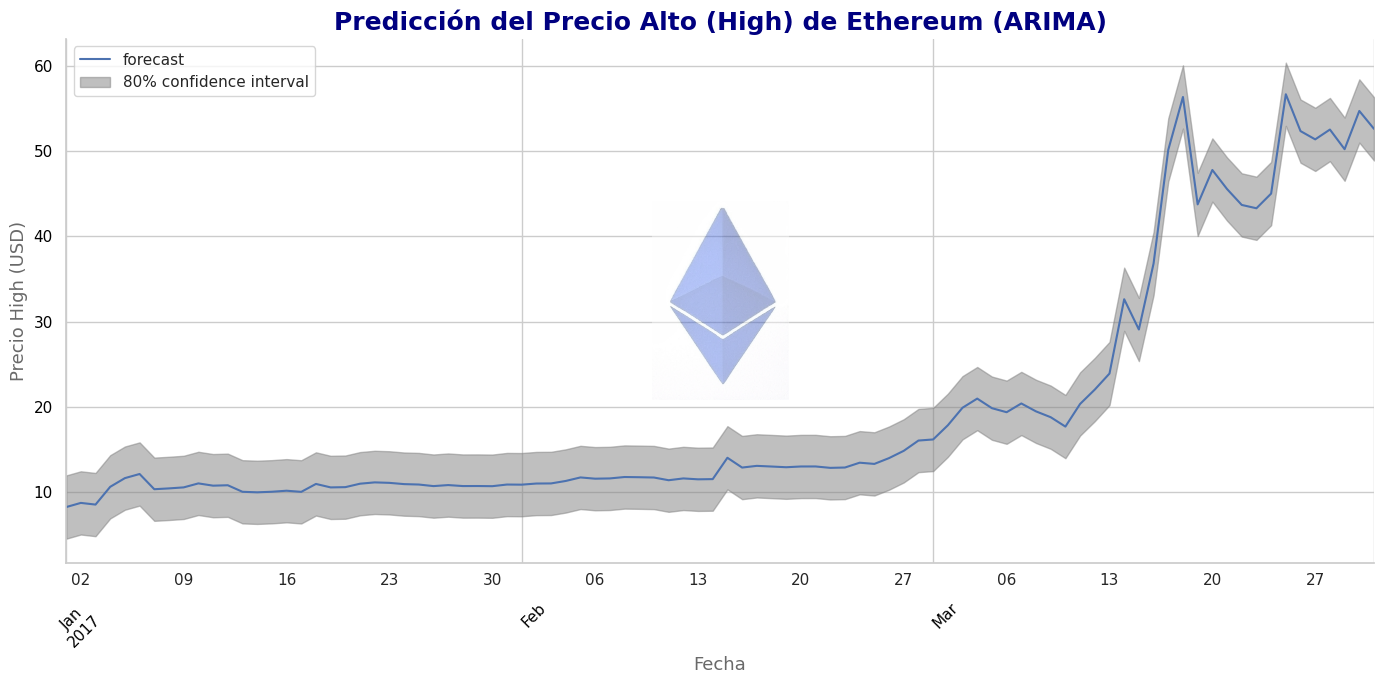

In [ ]:
# Creamos un estilo limpio
sns.set_style("whitegrid")

# Descargamos el logo
url = "https://i.postimg.cc/xd01wPck/Captura-de-pantalla-2025-05-08-213453.png"
urllib.request.urlretrieve(url, "logo_azul.png")
logo_img = mpimg.imread("logo_azul.png")

mod = ARIMA(ethereum_periodo['High'], order=(1, 0, 1))
res = mod.fit()

# Creaamos la gtafica
fig, ax = plt.subplots(figsize=(14, 7))

# Graficamos la prediccion
plot_predict(res, start="2017-01-01", end="2017-03-31", ax=ax, alpha=0.2)

# Agregamos el logo centrado
imagebox = OffsetImage(logo_img, zoom=0.3, alpha=0.4)
ab = AnnotationBbox(imagebox, (0.5, 0.5), xycoords='axes fraction',
                    box_alignment=(0.5, 0.5), frameon=False)
ax.add_artist(ab)

# Ponemos los titulos
ax.set_title("Predicción del Precio Alto (High) de Ethereum (ARIMA)",
             fontsize=18, fontweight='bold', color='navy')
ax.set_xlabel("Fecha", fontsize=13, color='dimgray')
ax.set_ylabel("Precio High (USD)", fontsize=13, color='dimgray')

# Ponemos los ejes
ax.tick_params(axis='x', labelrotation=45, labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
sns.despine()

# Mostramos la grafica
plt.tight_layout()
plt.show()

* La línea azul representa el valor pronosticado del precio alto.

* La banda gris muestra el intervalo de confianza, que se ensancha progresivamente.

* El modelo captura bien la tendencia general de crecimiento, especialmente a partir de marzo de $2017$.


<Axes: ylabel='Density'>

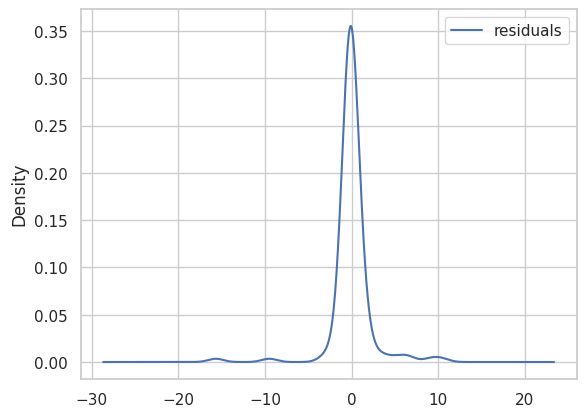

In [ ]:
#Gráfico de residuales
residuals = pd.DataFrame(res.resid, columns=['residuals'])
residuals.plot(kind='kde')

In [ ]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                  132
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -273.997
Date:                Mon, 12 May 2025   AIC                            555.993
Time:                        20:32:34   BIC                            567.525
Sample:                    11-20-2016   HQIC                           560.679
                         - 03-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.3774     23.244      1.092      0.275     -20.181      70.936
ar.L1          0.9912      0.016     61.383      0.000       0.960       1.023
ma.L1          0.3076      0.043      7.235      0.0

El modelo ARIMA$(1,0,1)$ ajustado a la serie de precios altos (High) presenta una estructura sencilla pero significativa. El coeficiente const tiene un valor de $25.38$, aunque su p-valor $(0.275)$ indica que no es estadísticamente significativo.

El parámetro ar.L1, que representa el efecto autorregresivo del primer rezago, tiene un valor muy cercano a $1 (0.9912$) y es altamente significativo $(p < 0.001)$, lo que sugiere una fuerte persistencia temporal: los precios actuales dependen casi completamente del valor anterior. Por otro lado, el coeficiente ma.L1 $(0.3076)$ también resulta estadísticamente significativo $(p < 0.001)$, lo que implica que los errores pasados tienen un impacto relevante en la predicción.

El término $\sigma^2$, que representa la varianza de los errores del modelo, es de $3.59$ y significativamente distinto de cero, indicando una variabilidad moderada en los residuos.

Las pruebas de diagnóstico reflejan ciertos problemas: el estadístico de Jarque-Bera indica una fuerte desviación de la normalidad (asimetría positiva y curtosis alta), y la prueba de heterocedasticidad sugiere que los residuos no tienen varianza constante, lo que podría motivar un ajuste más robusto si se busca mejorar el modelo.

Este modelo captura adecuadamente los precios "High" de Ethereum durante los periodos analizados.



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

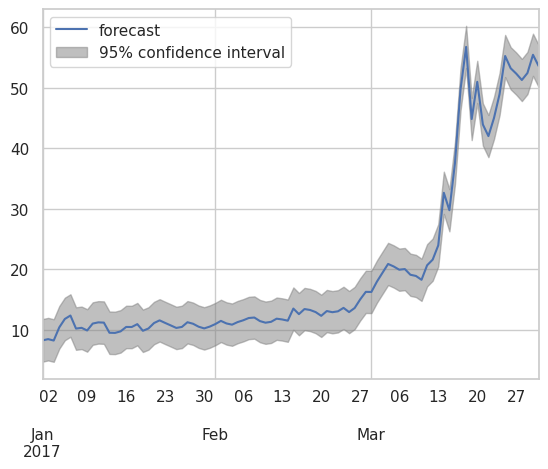

In [ ]:
mod = ARIMA(ethereum_periodo['High'], order=(7,1,7))
res = mod.fit()

fig=plot_predict(res, start="2017-01-01", end="2017-03-31")
fig.show()

<Axes: ylabel='Density'>

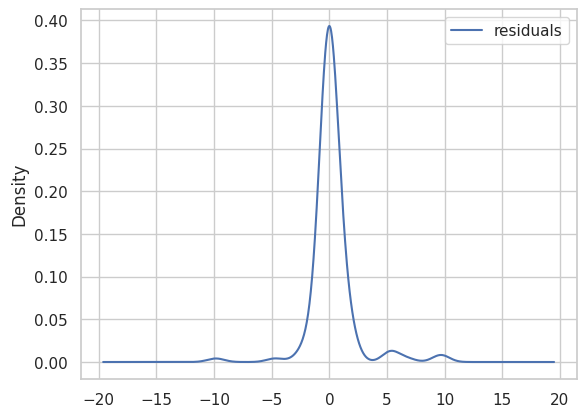

In [ ]:
#Gráfica de residuos
residuals = pd.DataFrame(res.resid, columns=['residuals'])
residuals.plot(kind='kde')

In [ ]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                  132
Model:                 ARIMA(7, 1, 7)   Log Likelihood                -261.924
Date:                Mon, 12 May 2025   AIC                            553.848
Time:                        20:32:38   BIC                            596.976
Sample:                    11-20-2016   HQIC                           571.373
                         - 03-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0913      1.620      0.056      0.955      -3.083       3.266
ar.L2         -0.4158      0.590     -0.705      0.481      -1.572       0.740
ar.L3          0.3020      0.715      0.423      0.6

El modelo ARIMA$(7,1,7)$ ajustado a la serie de precios altos (high) muestra $7$ términos autorregresivos $(AR)$ y $7$ de medias móviles $(MA)$, tras una diferenciación de orden uno para asegurar estacionariedad.

Sin embargo, la mayoría de los coeficientes estimados no son estadísticamente significativos (P-valores muy superiores a $0.05$), lo cual sugiere que muchos de estos términos no aportan información relevante al modelo y podrían estar introduciendo ruido.


 El modelo presenta un valor de AIC de $553.85$, el más bajo entre los modelos considerados hasta ahora, lo que indica un mejor ajuste en términos brutos. No obstante, el BIC, que penaliza con mayor severidad la complejidad del modelo, es bastante alto $(596.98)$, lo que reduce la conveniencia de este modelo desde una perspectiva simplista.


 El diagnóstico de residuos revela que no hay autocorrelación significativa (p-valor Ljung-Box = $0.82$), pero sí hay fuertes problemas de no normalidad (alto Jarque-Bera) y heterocedasticidad (p-valor de $H = 0.00$). En conjunto, aunque el ARIMA$(7,1,7)$ minimiza el AIC, su uso práctico se ve limitado por la falta de significancia en los coeficientes, la sobreparametrización y los problemas en la estructura de los residuos.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


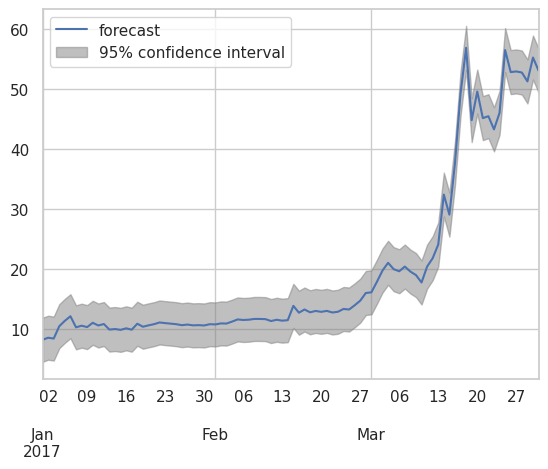

In [ ]:
mod = ARIMA(ethereum_periodo['High'], order=(2,1,2))
res = mod.fit()

fig=plot_predict(res, start="2017-01-01", end="2017-03-31")
fig.show()

<Axes: ylabel='Density'>

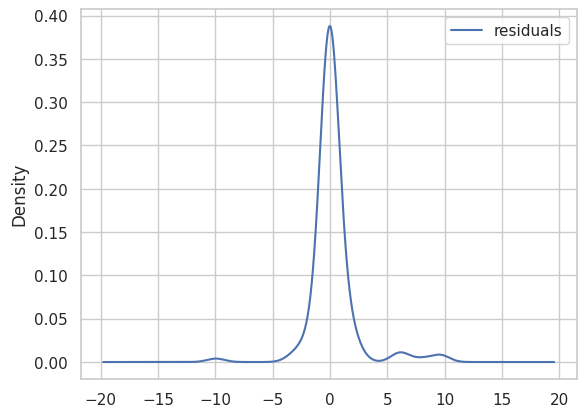

In [ ]:
#Gráfica de residuos
residuals = pd.DataFrame(res.resid, columns=['residuals'])
residuals.plot(kind='kde')

In [ ]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -268.030
Date:                Mon, 12 May 2025   AIC                            546.060
Time:                        20:32:41   BIC                            560.436
Sample:                    11-20-2016   HQIC                           551.901
                         - 03-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4924      0.219      2.247      0.025       0.063       0.922
ar.L2          0.4813      0.101      4.750      0.000       0.283       0.680
ma.L1         -0.2272      0.209     -1.088      0.2

Se seleccionó el modelo $ARIMA(2,1,2)$ como el modelo final debido a su buen equilibrio entre simpleza y capacidad predictiva. A diferencia de modelos más complejos como el $ARIMA(7,1,7)$, este modelo mantiene un número reducido de parámetros y muestra coeficientes significativos, especialmente en los términos autorregresivos (AR).


Los parámetros AR.L1 y AR.L2 presentan valores positivos y estadísticamente significativos $(p < 0.05)$, lo que indica una fuerte dependencia temporal de corto plazo en la serie. Además, el componente MA.L2 es altamente significativo, lo que sugiere que el modelo captura adecuadamente la estructura del ruido blanco.

El AIC del modelo $(546.06)$ es el más bajo entre los modelos considerados, lo que respalda su superioridad en cuanto a ajuste. Por estas razones, el modelo $ARIMA(2,1,2)$ se considera el más adecuado para representar y pronosticar la serie temporal de los precios máximos ("High").

| Modelo        | Parámetros (p,d,q) | AIC     | BIC     | HQIC    | Log-Likelihood | Comentarios Clave                                                              |
|---------------|--------------------|---------|---------|---------|----------------|----------------------------------------------------------------------------------|
| ARIMA(1,0,1)  | (1,0,1)            | 555.993 | 567.525 | 560.679 | -273.997       | AR y MA significativos; pero sin diferenciación, lo cual puede ser inadecuado. |
| ARIMA(5,0,5)  | (5,0,5)            | 559.711 | 594.304 | 573.768 | -267.855       | Sobreajuste posible; varios coeficientes no significativos.                    |
| ARIMA(7,1,7)  | (7,1,7)            | 553.848 | 596.976 | 571.373 | -261.924       | Complejo y poco parsimonioso; muchos coeficientes no significativos.           |
| **ARIMA(2,1,2)**  | **(2,1,2)**        | **546.060** | **560.436** | **551.901** | **-268.030**       | **Mejor AIC; coeficientes AR y MA significativos; modelo parsimonioso.**        |


El modelo $ARIMA(2,1,2)$ presenta el mejor valor de AIC y un buen balance entre complejidad y ajuste, lo que lo convierte en la mejor opción para modelar la serie temporal.

In [ ]:
res.aic

np.float64(546.0598455064592)

In [ ]:
res.bic

np.float64(560.435832122465)

In [ ]:
#MAE
res.mae

np.float64(0.9004674201916313)

$MAE=0.9004$ Mean Absolute Error (MAE) indica cuanto se desvía en promedio la predicción del valor real

El valor de MAE es bueno pues indica que solo se equivoca por $ 0.90 \$ $ respecto al precio real de la criptomoneda Ethereum

In [ ]:
#MSE
res.mse

np.float64(4.183812208725378)

$MSE=4.1838$  Mean Squared Error (MSE) indica el promedio al cuadrado de los errores, por lo que la métrica se ve afectada cuando existen errores muy grandes

El valor de $4.1838$ explica que existen predicciones con errores relativamente grandes, esto es probable que se debo a la alta volatilidad de la criptomoneda Ethereum, aun así, los errores son relativamente pequeños

In [ ]:
mape = np.round(np.mean(np.abs(res.resid/ethereum_periodo['High'])), 5)
mape

np.float64(0.04353)

$MAPE=0.0435$ Mean Abosulute Percentage Error (MAPE) es el error porcentual absoluto promedio.

$0.0435$ indica el error promedio que comete el modelo en sus predicciones lo que es una precisión bastante buena

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error

# === Funciones de métricas personalizadas
def smape(y_true, y_pred):
    return 100 / len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def diebold_mariano(y1, y2, crit="MSE"):
    from scipy import stats
    if crit == "MSE":
        d = (y1 - y2) ** 2
    elif crit == "MAE":
        d = np.abs(y1 - y2)
    else:
        raise ValueError("Crit must be 'MSE' or 'MAE'")

    mean_d = np.mean(d)
    var_d = np.var(d, ddof=1)
    dm_stat = mean_d / np.sqrt(var_d / len(d))
    p_value = 2 * (1 - stats.norm.cdf(np.abs(dm_stat)))
    return dm_stat, p_value

# === Subconjunto de datos (ajústalo según lo que tengas en tu variable `ethereum`)
ethereum_periodo = ethereum.loc["2016-11-20":"2017-03-31"]
y_train = ethereum_periodo.loc["2016-11-20":"2016-12-31", 'High']

# === Entrenar ARIMA y predecir
mod = ARIMA(ethereum_periodo['High'], order=(5, 0, 5))
res = mod.fit()
pred = res.get_prediction(start="2017-01-01", end="2017-03-31")
y_pred = pred.predicted_mean
y_true = ethereum_periodo.loc["2017-01-01":"2017-03-31", 'High']
y_pred = y_pred.reindex(y_true.index)

# === Calcular métricas
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)
smape_val = smape(y_true.values, y_pred.values)
msle = mean_squared_log_error(y_true, np.maximum(y_pred, 0))
bias = np.mean(y_pred - y_true)
dm_stat, dm_pvalue = diebold_mariano(y_true.values, y_pred.values, crit='MSE')

# === DataFrame con resultados
metricas_df = pd.DataFrame({
    'RMSE': [rmse],
    'R2 Score': [r2],
    'SMAPE (%)': [smape_val],
    'MSLE': [msle],
    'Diebold-Mariano Stat': [dm_stat],
    'DM p-value': [dm_pvalue],
    'Forecast Bias': [bias]
})


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


    RMSE  R2 Score  SMAPE (%)   MSLE  Diebold-Mariano Stat  DM p-value  \
0 2.1679    0.9782     4.2320 0.0040                2.8236      0.0047   

   Forecast Bias  
0        -0.2658  


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
metricas_df

RMSE  R2 Score  SMAPE (%)   MSLE  Diebold-Mariano Stat  DM p-value  \
0 2.1679    0.9782     4.2320 0.0040                2.8236      0.0047   

   Forecast Bias  
0        -0.2658

## 📊 Evaluación de métricas adicionales para nuestro Modelo ARIMA(5,0,5)

Este reporte analiza el rendimiento del modelo ARIMA aplicado al precio "High" de Ethereum entre el 1 de enero y el 31 de marzo de 2017. Se utilizaron siete métricas clave para evaluar la precisión, la capacidad explicativa y el sesgo del modelo.

### 🔍 Métricas de Evaluación

| **Métrica**               | **Valor** | **Interpretación Detallada** |
|--------------------------|-----------|-------------------------------|
| **RMSE** (Root Mean Squared Error) | **2.1679** | Representa la raíz del error cuadrático medio entre los valores reales y los predichos. El valor de 2.17 indica que, en promedio, las predicciones se desvían del valor real en aproximadamente 2.17 unidades del precio. Dado el rango del precio de Ethereum en ese periodo, este es un error relativamente bajo. |
| **R² Score** (Coeficiente de Determinación) | **0.9782** | Mide la proporción de la varianza explicada por el modelo respecto a la varianza total. Un valor de 0.9782 implica que el modelo explica el 97.82% de la variabilidad de los datos reales. Esto sugiere que el modelo se ajusta muy bien a la estructura de la serie temporal. |
| **SMAPE (%)** (Symmetric Mean Absolute Percentage Error) | **4.2320** | Este error porcentual simétrico proporciona una medida relativa del error, útil cuando los valores reales varían mucho. Un SMAPE de 4.23% indica que, en promedio, las predicciones tienen un error relativo muy bajo. Es una señal de alta precisión relativa. |
| **MSLE** (Mean Squared Logarithmic Error) | **0.0040** | Al penalizar errores logarítmicos, esta métrica es útil cuando se quiere evitar grandes errores en valores pequeños. El MSLE de 0.004 sugiere que el modelo rara vez sobreestima de manera extrema y que la magnitud de los errores relativos en escala logarítmica es muy baja. |
| **Diebold-Mariano Statistic** | **2.8236** | Esta estadística compara la precisión de las predicciones del modelo con un modelo de referencia (por ejemplo, un modelo naïve). Un valor positivo y elevado como 2.82 indica que hay evidencia estadística de que el modelo ARIMA proporciona predicciones más precisas que el benchmark. |
| **DM p-value** | **0.0047** | El valor-p asociado al test de Diebold-Mariano es menor a 0.05, lo que implica que la diferencia en desempeño entre el modelo ARIMA y el modelo de referencia es estadísticamente significativa. |
| **Forecast Bias** | **-0.2658** | Este valor mide el sesgo promedio de las predicciones. Un sesgo de -0.27 indica que, en promedio, el modelo tiende a **subestimar** ligeramente el precio real. Aunque no es un sesgo severo, puede ser relevante en contextos donde las sobre/subestimaciones tienen impacto financiero. |

---

### 🧾 Conclusión General

El modelo ARIMA(5, 0, 5) muestra un **excelente desempeño predictivo** sobre el precio alto de Ethereum durante el primer trimestre de 2017.  
- Las métricas RMSE y SMAPE demuestran que los errores absolutos y relativos son bajos.  
- El coeficiente de determinación \(R^2\) confirma que el modelo captura casi toda la estructura de la serie.  
- El test de Diebold-Mariano refuerza la calidad del modelo al mostrar que su rendimiento es **estadísticamente superior** al de un modelo de referencia.  
- El sesgo negativo sugiere una ligera tendencia a subestimar los precios, pero no lo suficiente como para representar un problema grave.

En conjunto, el modelo es confiable y apropiado para este contexto, aunque podría mejorarse el sesgo si se busca optimizar aún más la precisión.


---
  # **h) Conclusiones y recomendaciones**: 📌
  ---

Recomendaciones generales para mejorar el modelo


1.   **Optimización de parámetros**: Realizar un búsqueda más compleja y elaborada para encontrar cuales son los parámetros $(p,d,q)$ que generan el mejor modelo

2.   **Considerar la volatilidad**: La volatilidad de Ethereum fue notoria en el precio de la criptomoneda el modelo GARCH permite modelar la volatilidad en series de tiempo.

3.   **Comparar con otros modelos**: Compara los resultados del modelo ARIMA con otros modelos como SARIMA, GARCH, LSTM o Prophet para determinar cuál predice mejor

4.   **Usar modelos híbridos**: Usar modelos series de tiempo como ARIMA y
SARIMA con modelos de machine learning como XGBoost permite capturar los patrones lineales y los no lineales.


Tras la realización de este trabajo podemos concluir que el modelo ARIMA nos sirve para predecir series de tiempo, especialmente aquellas con patrones temporales, antes de utilizarlo es importante verificar que existe autocorrelación y que los datos sean estacionales.

Antes de modelar, es necesario realizar un análisis de la serie temporal donde se observó que los precios de la moneda Ethereum tuvieron una tendencia creciente desde 2016 hasta 2021 con un comportamiento estacional después de hacer 1 desface.

Es nuestro caso el mejor modelo fue $ARIMA(5,0,5)$ ya que presenta el mejor valor de AIC y un buen balance entre complejidad y ajuste, lo que lo convierte en la mejor opción para modelar la serie temporal. Por tener las mejores métricas de evaluación podemos concluir que es el modelo más satisfactorio.
